In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error 
import statsmodels.api as sm
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('data/VN30.csv')
df.drop(columns= 'Unnamed: 0', inplace= True)
df.head()

Date   ACB    MWG    MSN    BID    VRE    POW    PLX    HPG    VNM  \
0  2020-01-02  9460  37730  46160  32369  34350  11352  48590  10930  82450   
1  2020-01-03  9460  37170  46570  32229  34600  11161  49100  11000  82720   
2  2020-01-06  9260  36990  45830  31610  33650  10827  49280  10930  82090   
3  2020-01-07  9260  37270  46000  32229  33950  10731  48590  10790  82860   
4  2020-01-08  9090  36370  45350  32509  32700  10254  47910  10680  83060   

   ...      GVR     SAB      BCM   MBB    GAS  SSB     SHB   SSI    STB   VPB  
0  ...  10150.0  100180  28160.0  9680  68440  NaN  2990.0  8740  10200  7250  
1  ...  10500.0  100440  27880.0  9700  68590  NaN  2900.0  8670  10200  7200  
2  ...  10320.0  100080  27590.0  9560  70760  NaN  2860.0  8640  10050  7030  
3  ...  10050.0  100180  26830.0  9580  70250  NaN  2860.0  8670  10150  7180  
4  ...   9700.0   99810  26640.0  9450  70180  NaN  2860.0  8430   9980  7090  

[5 rows x 31 columns]

In [15]:
df.columns[1:]

Index(['ACB', 'MWG', 'MSN', 'BID', 'VRE', 'POW', 'PLX', 'HPG', 'VNM', 'VHM',
       'TCB', 'HDB', 'VIB', 'VCB', 'VJC', 'VIC', 'FPT', 'CTG', 'TPB', 'BVH',
       'GVR', 'SAB', 'BCM', 'MBB', 'GAS', 'SSB', 'SHB', 'SSI', 'STB', 'VPB'],
      dtype='object')

In [18]:
def interactive_plot(df):
  for i in df.columns[1:]:
    plt.figure(figsize=(16, 6))
    plt.grid(True)
    x = pd.to_datetime(df['Date'])
    plt.plot(x, df[i])
    plt.title(i)
    plt.xlabel("Dates")
    plt.ylabel("Stock Price")
    plt.show()

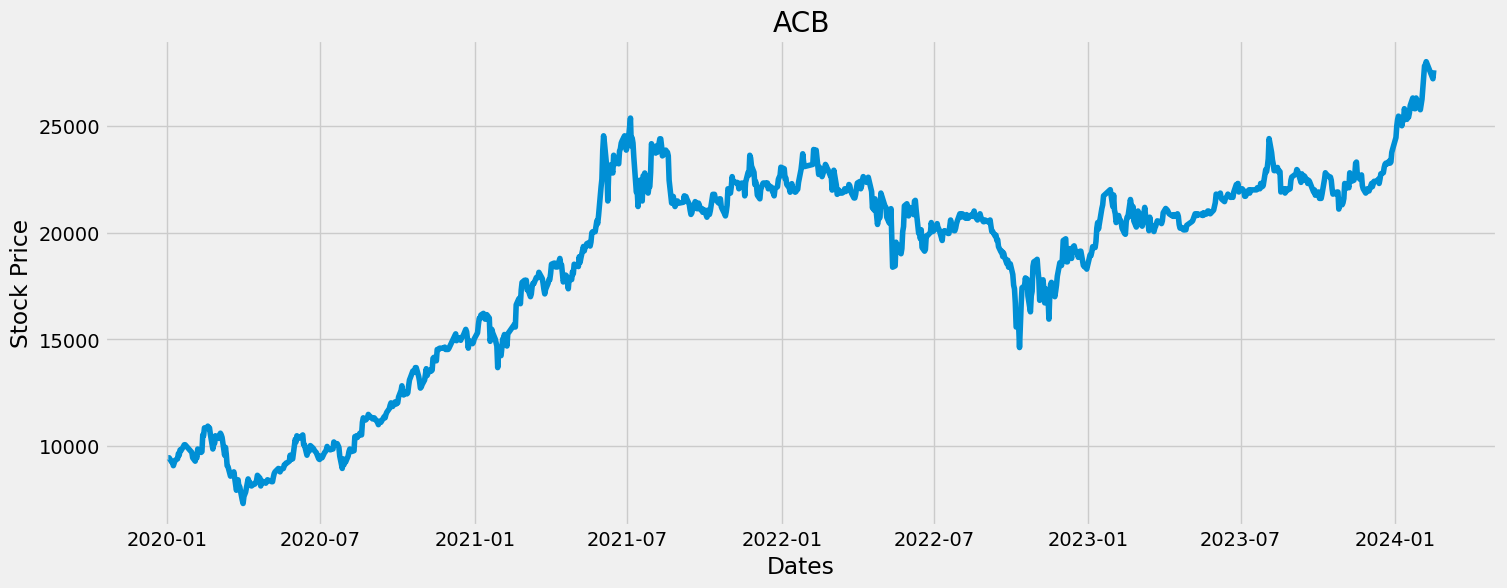

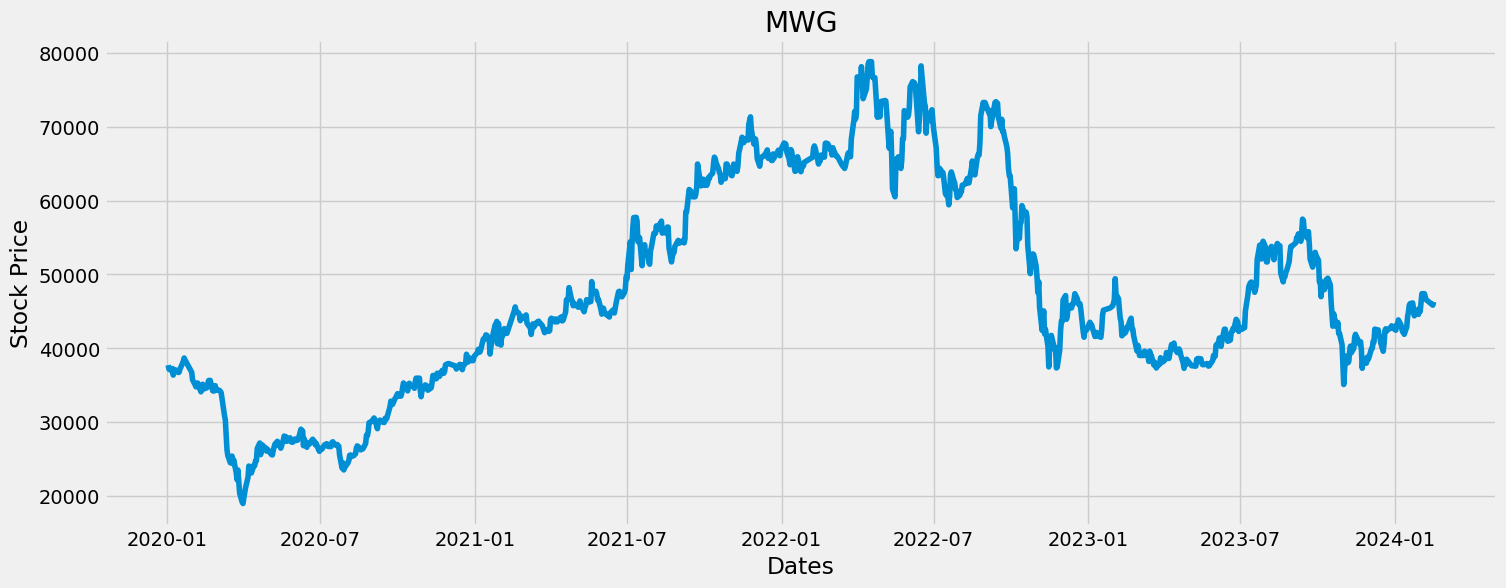

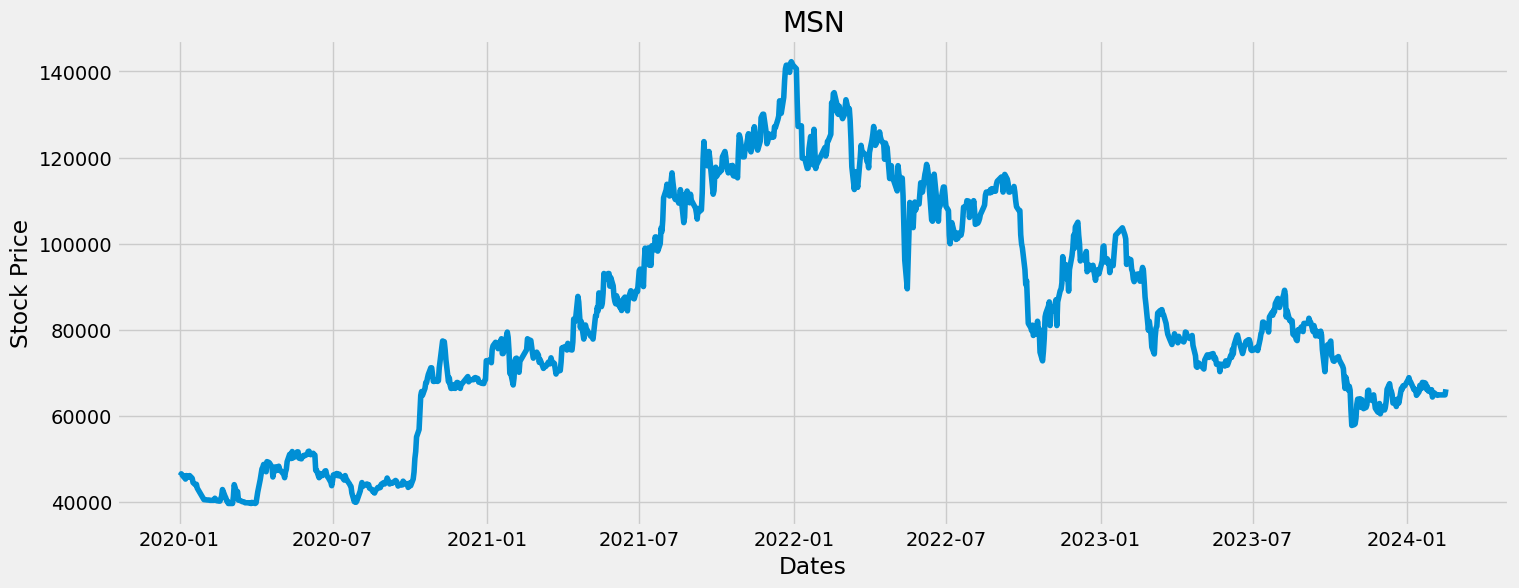

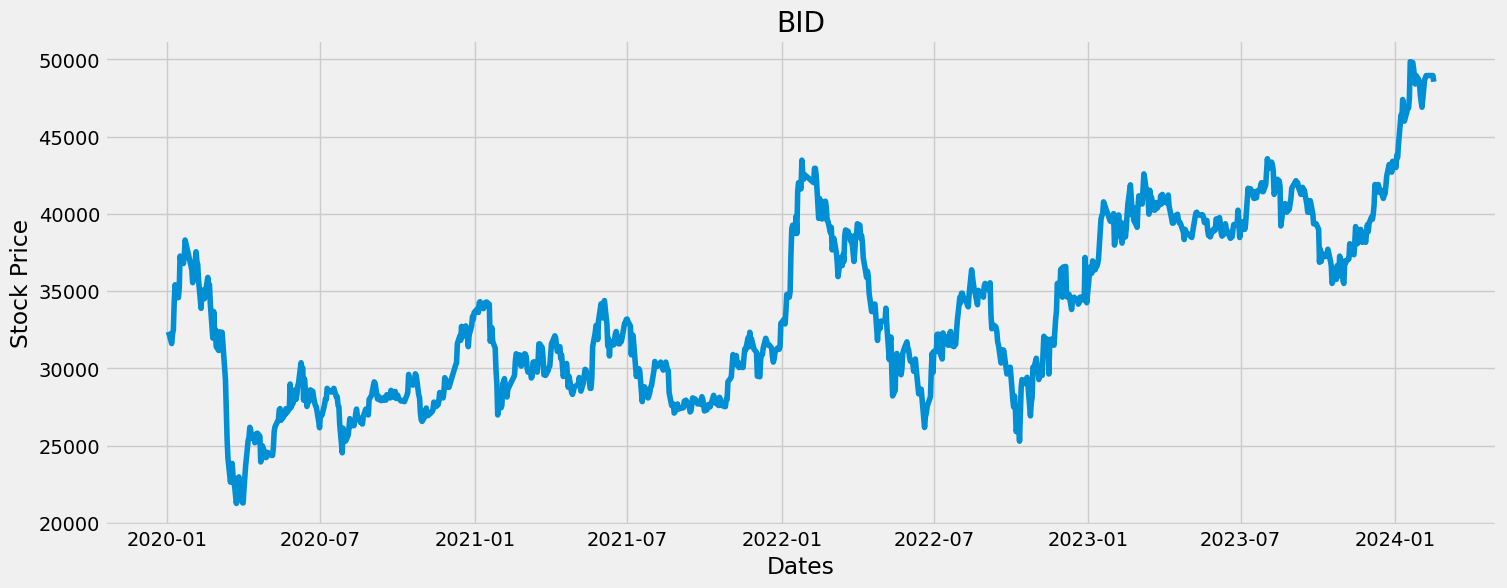

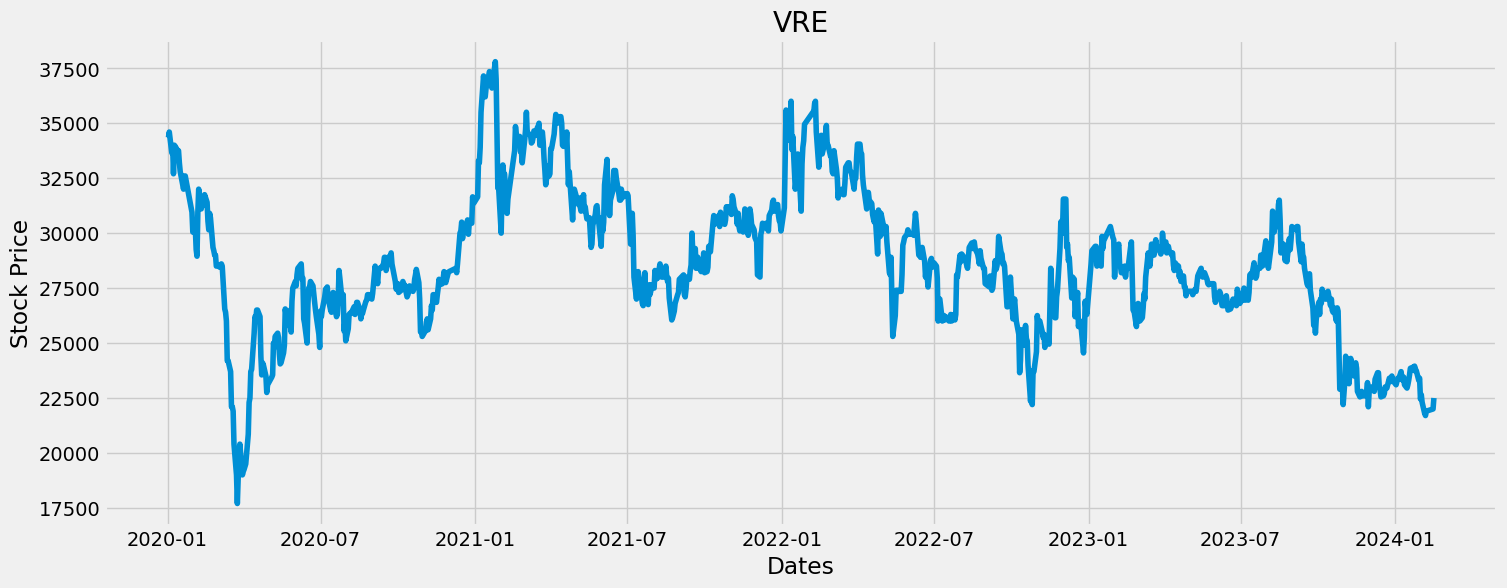

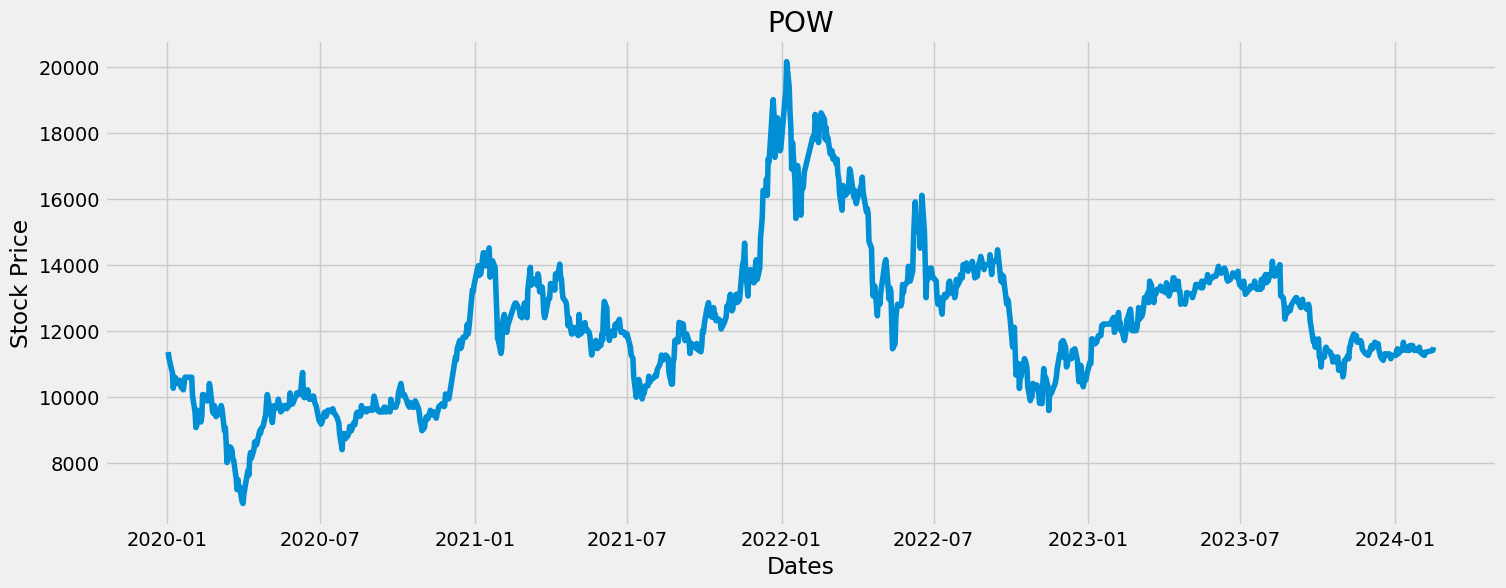

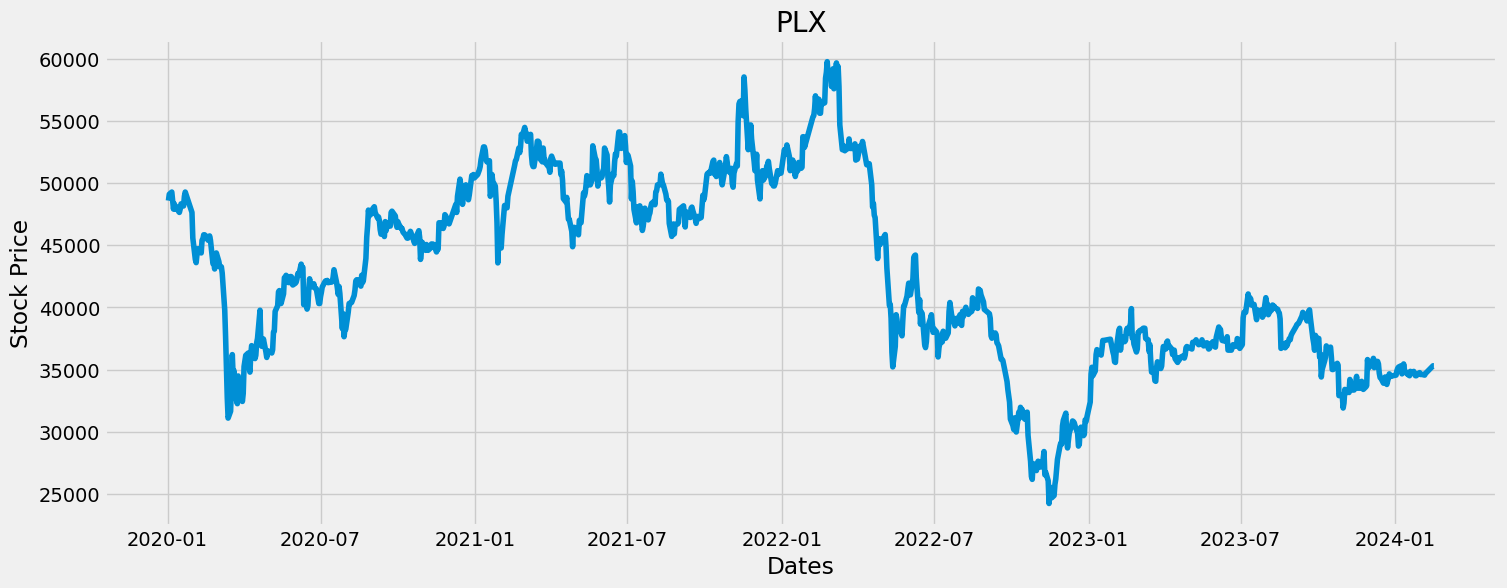

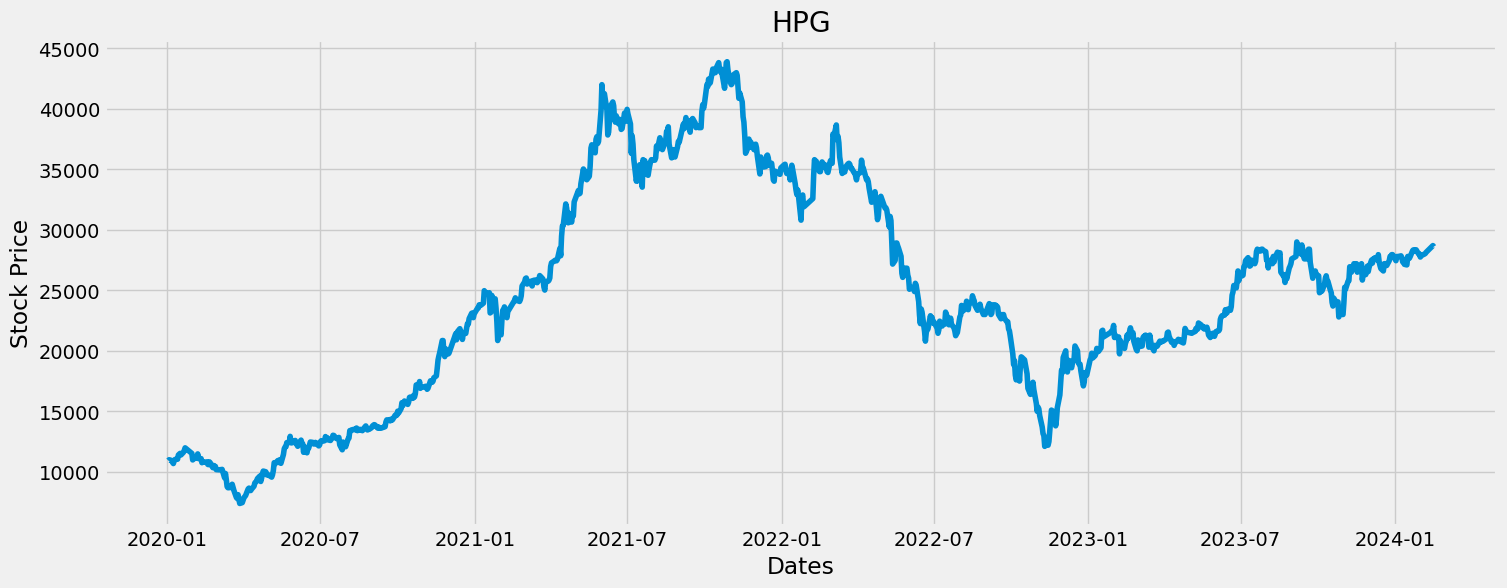

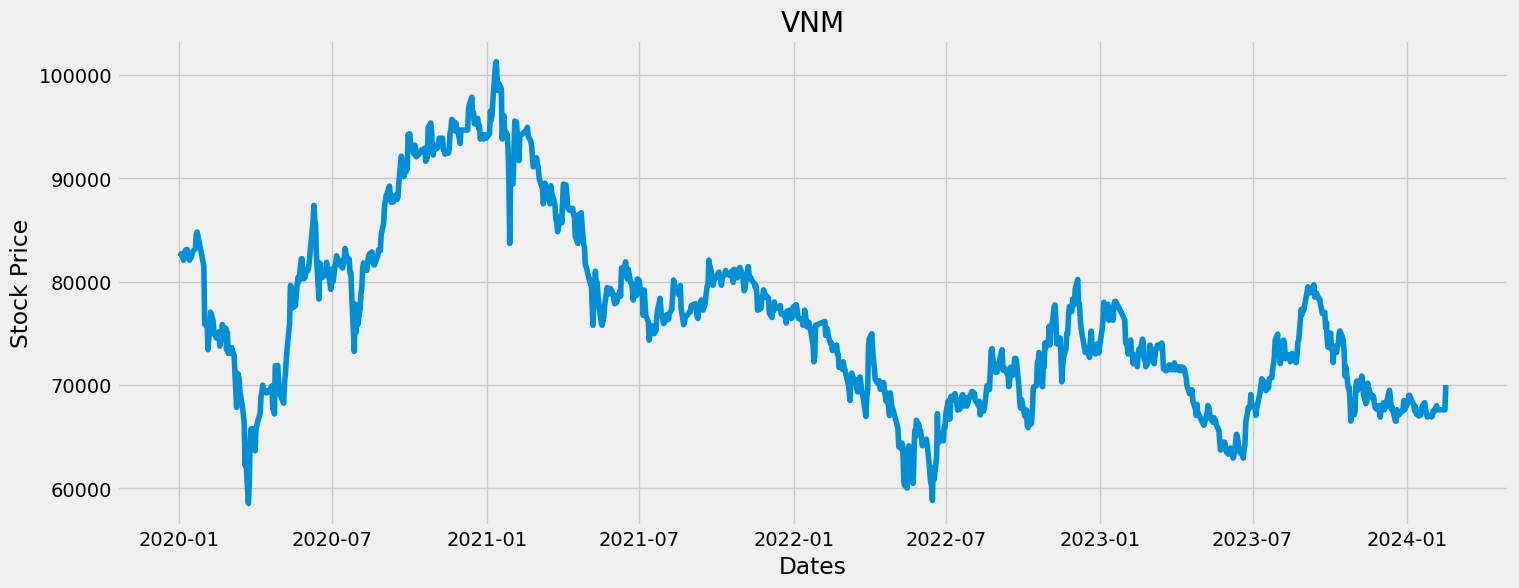

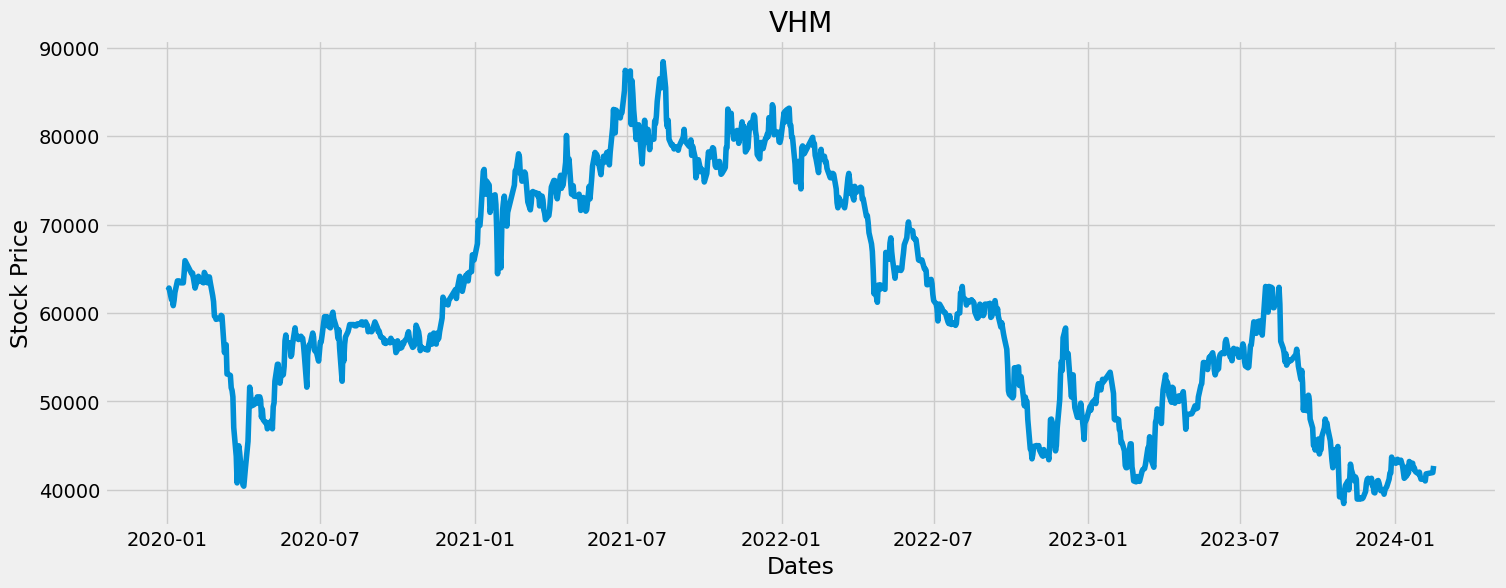

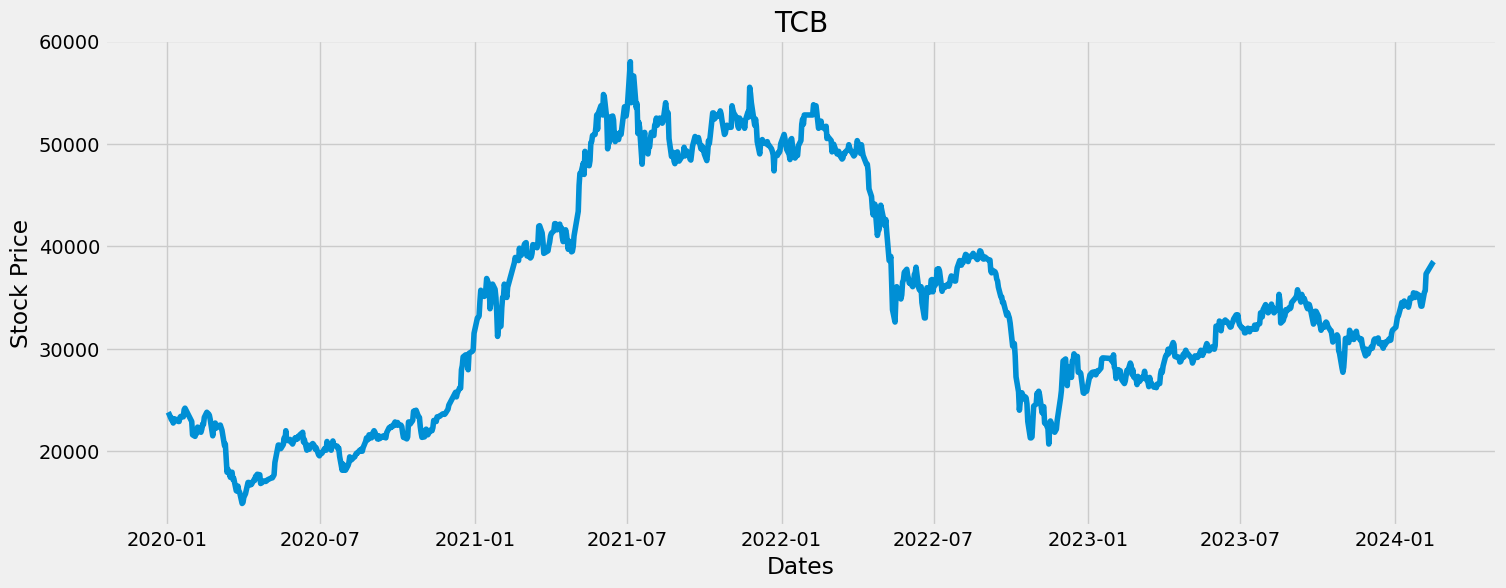

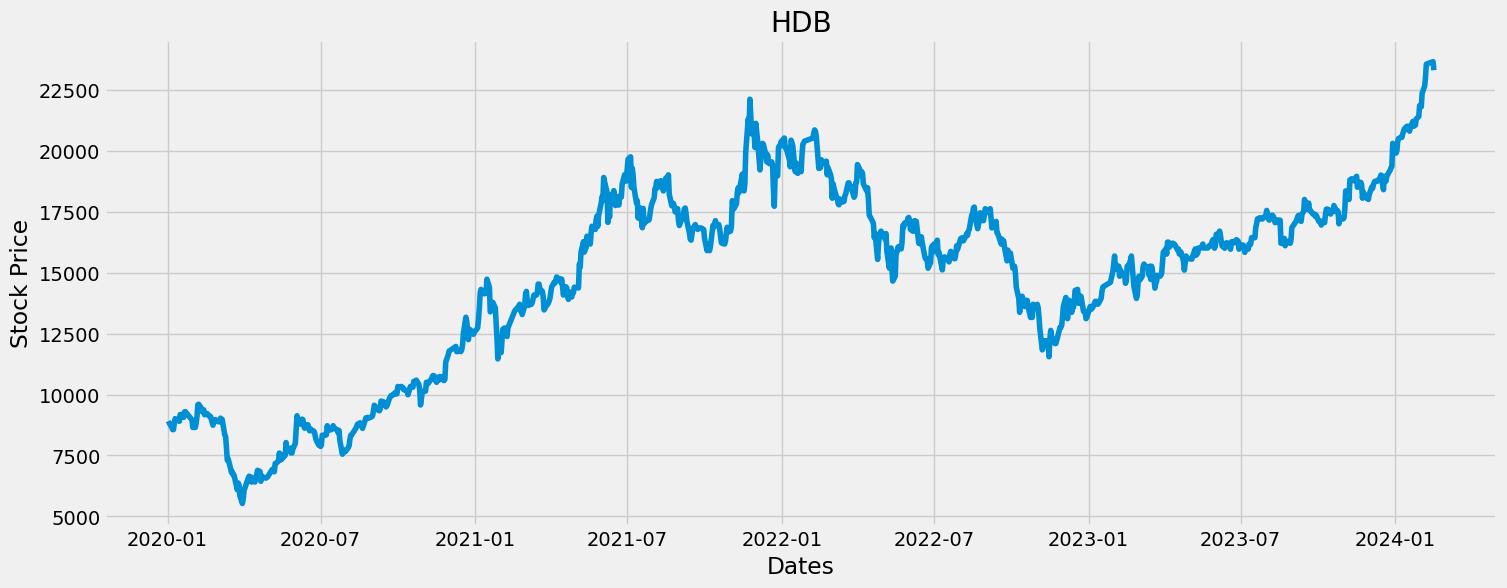

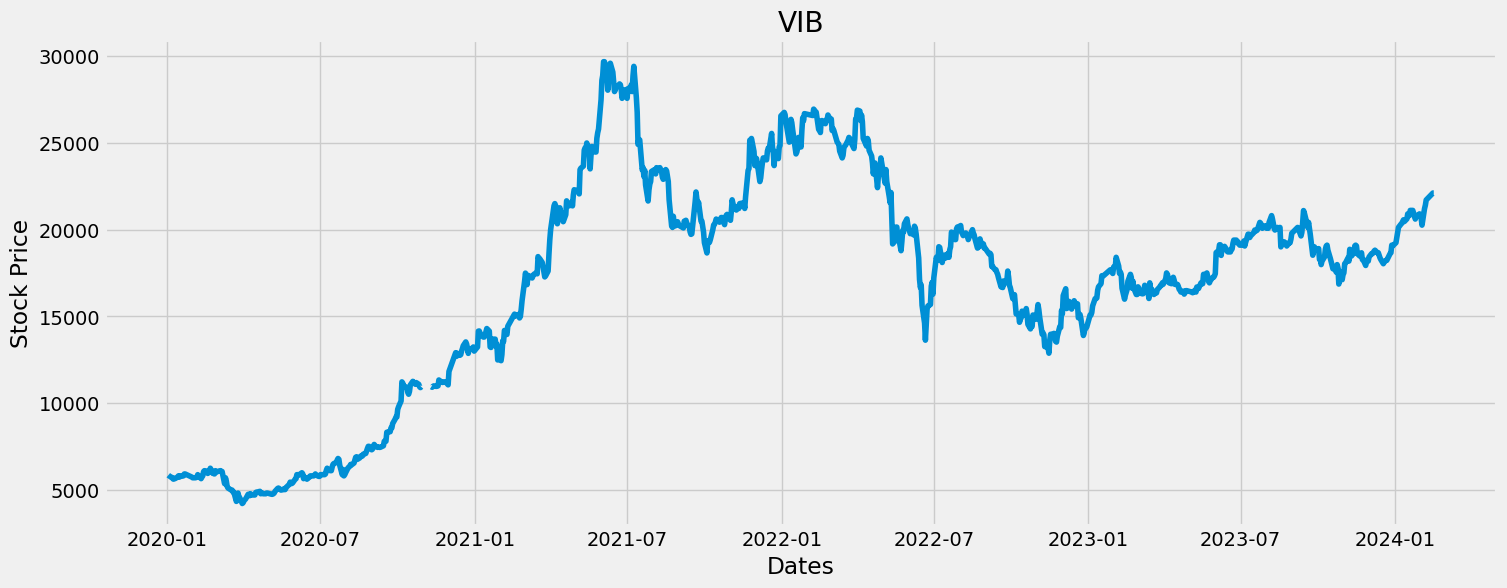

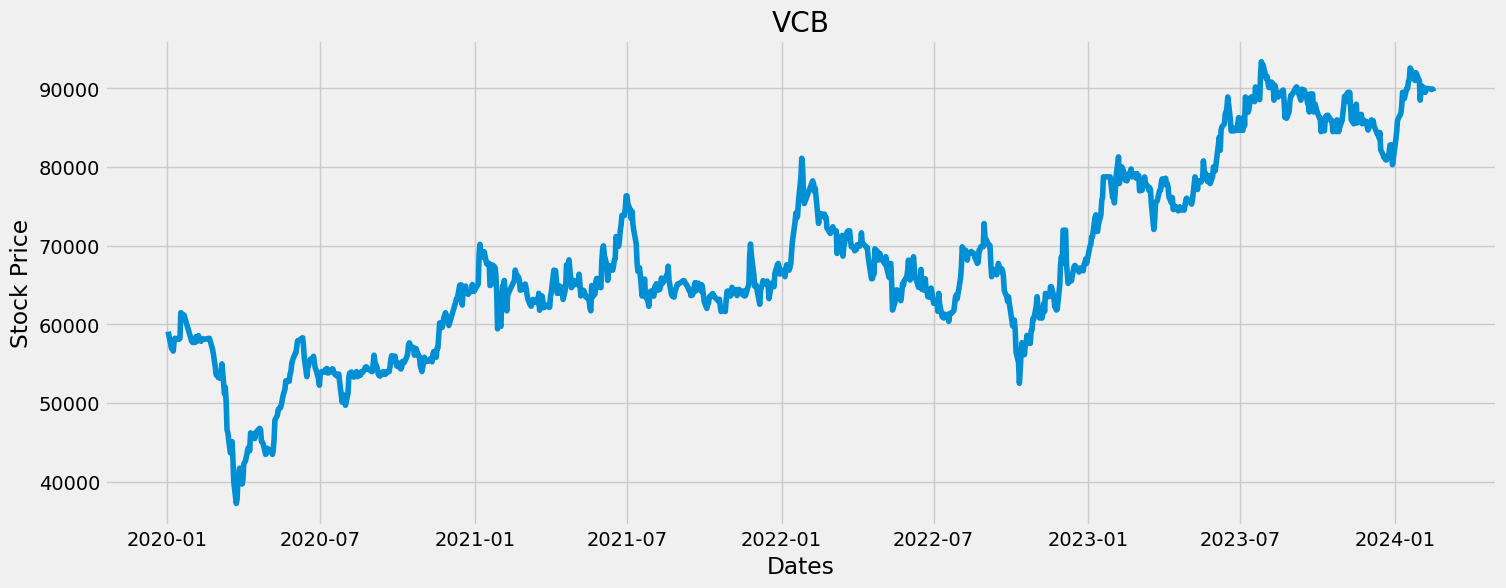

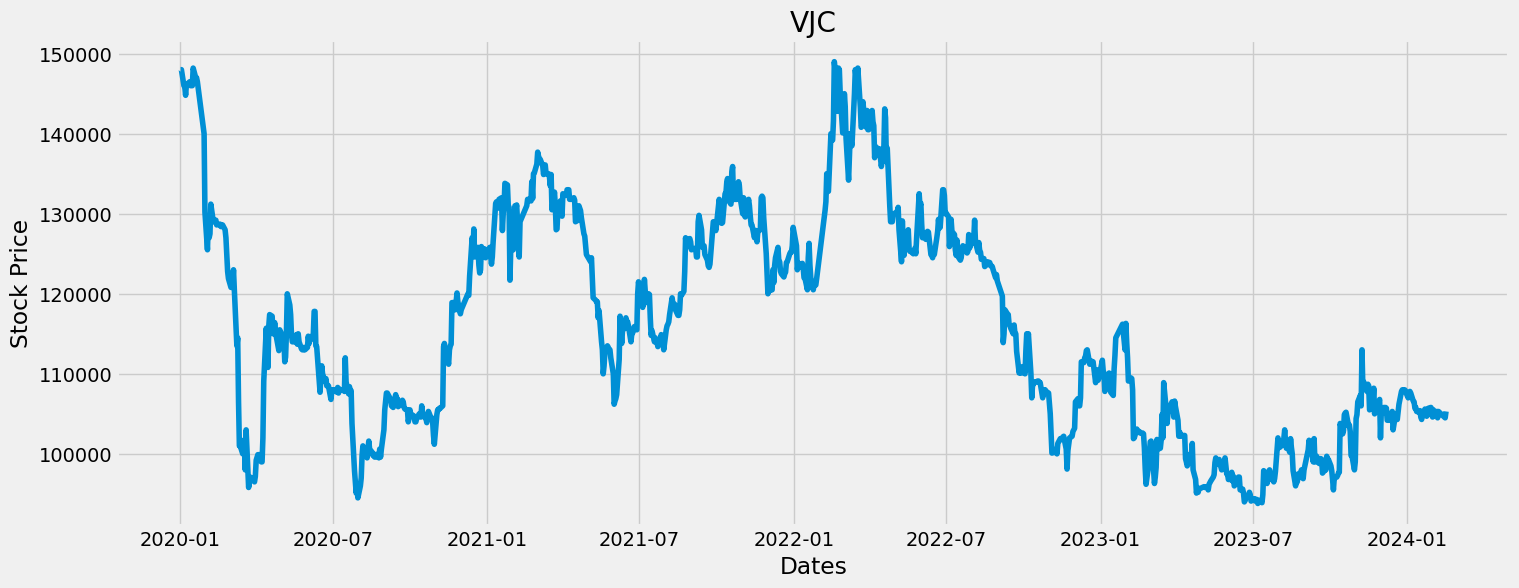

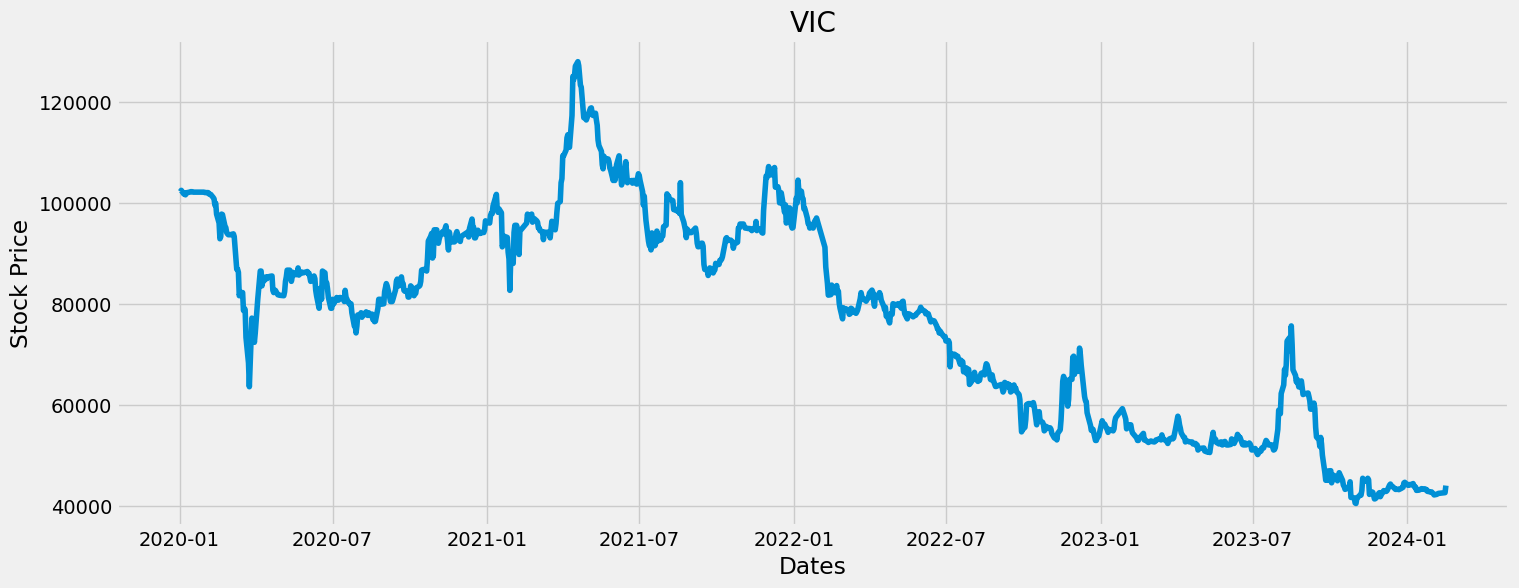

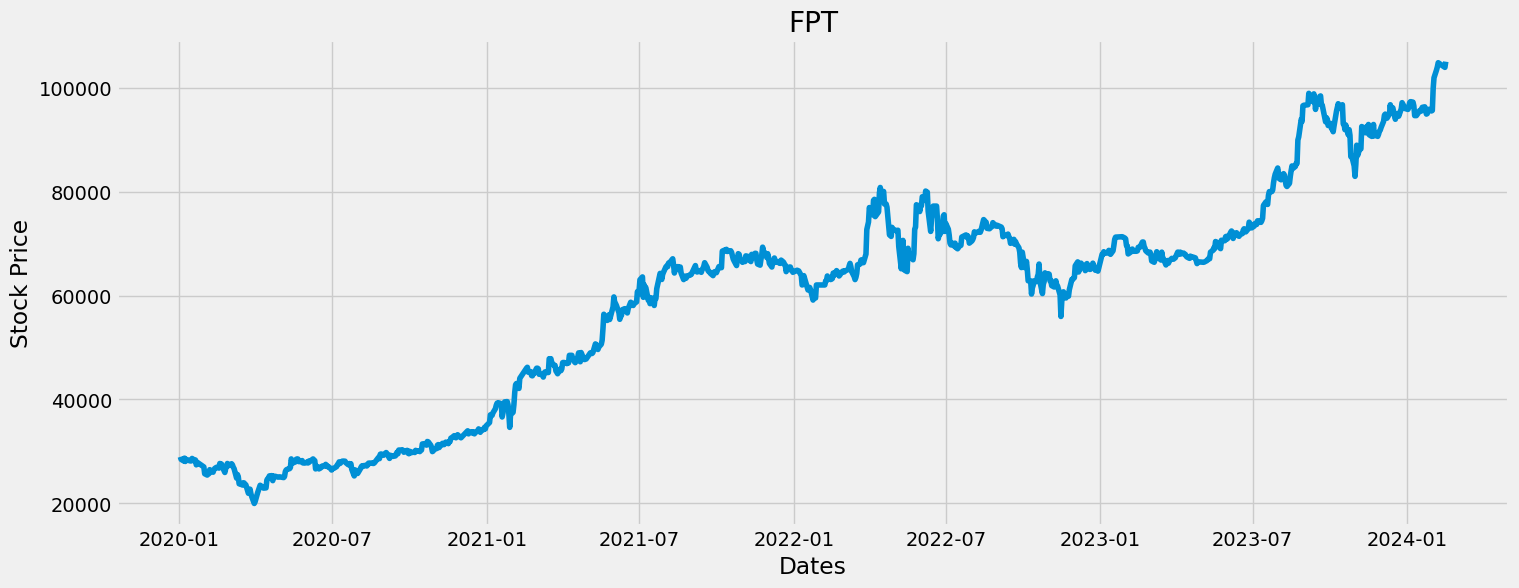

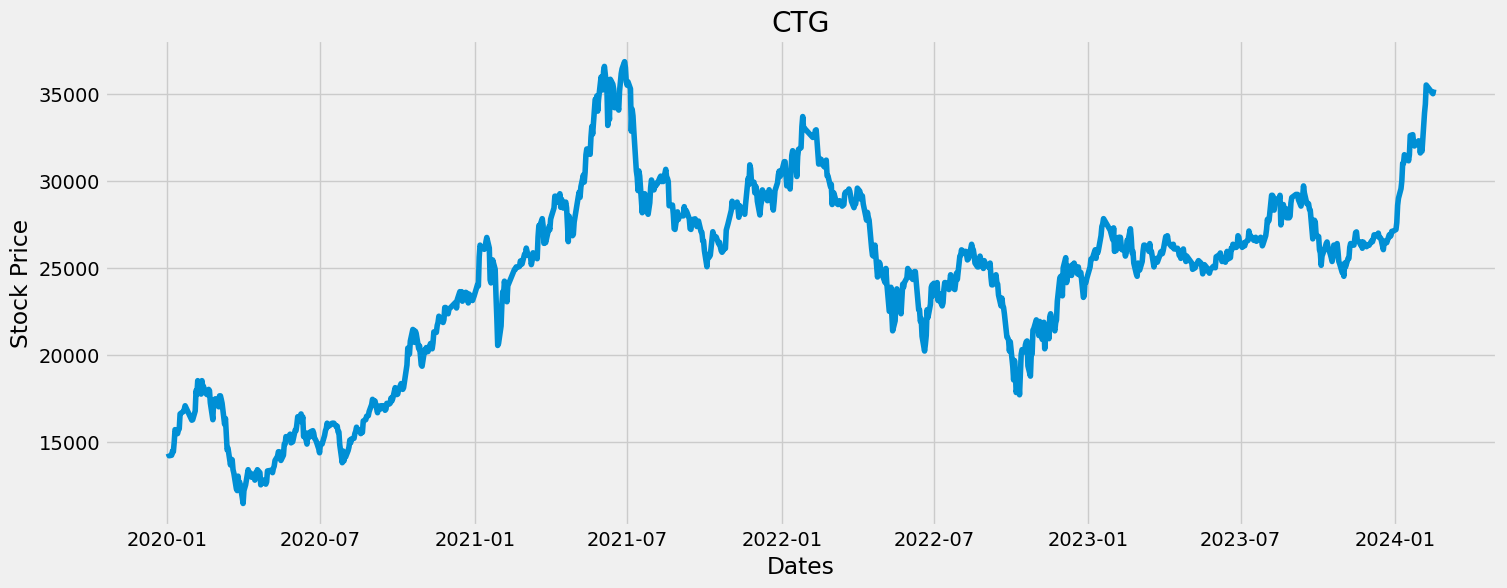

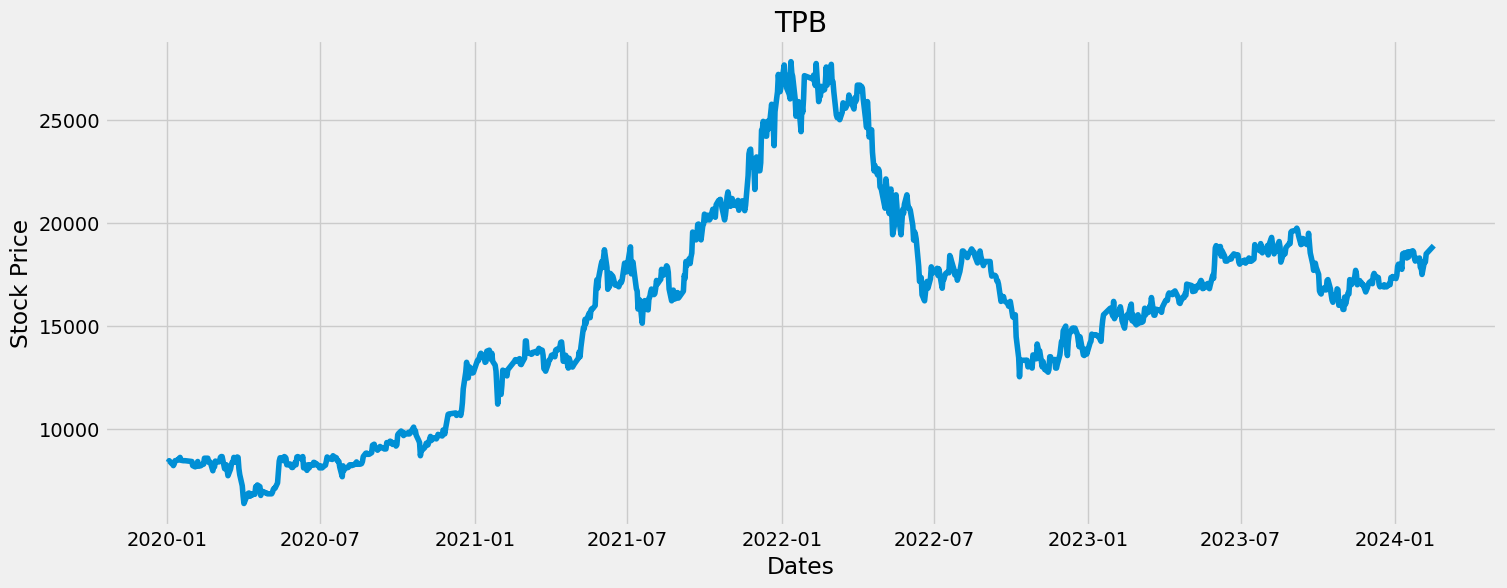

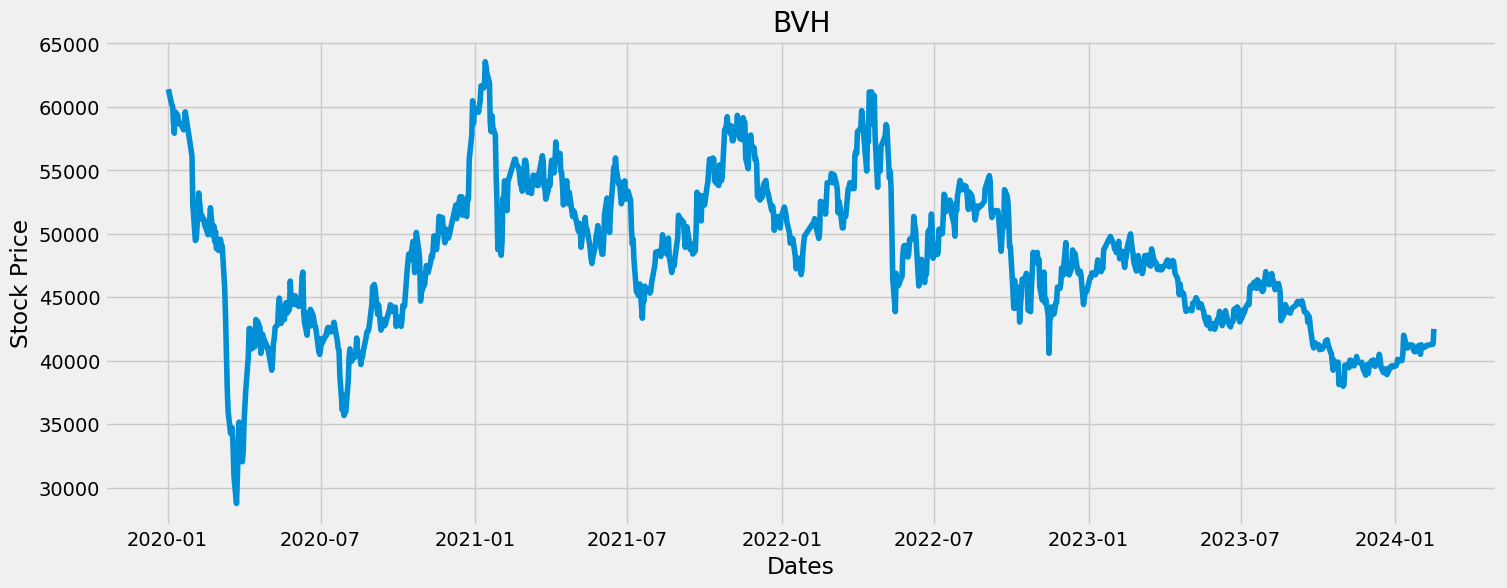

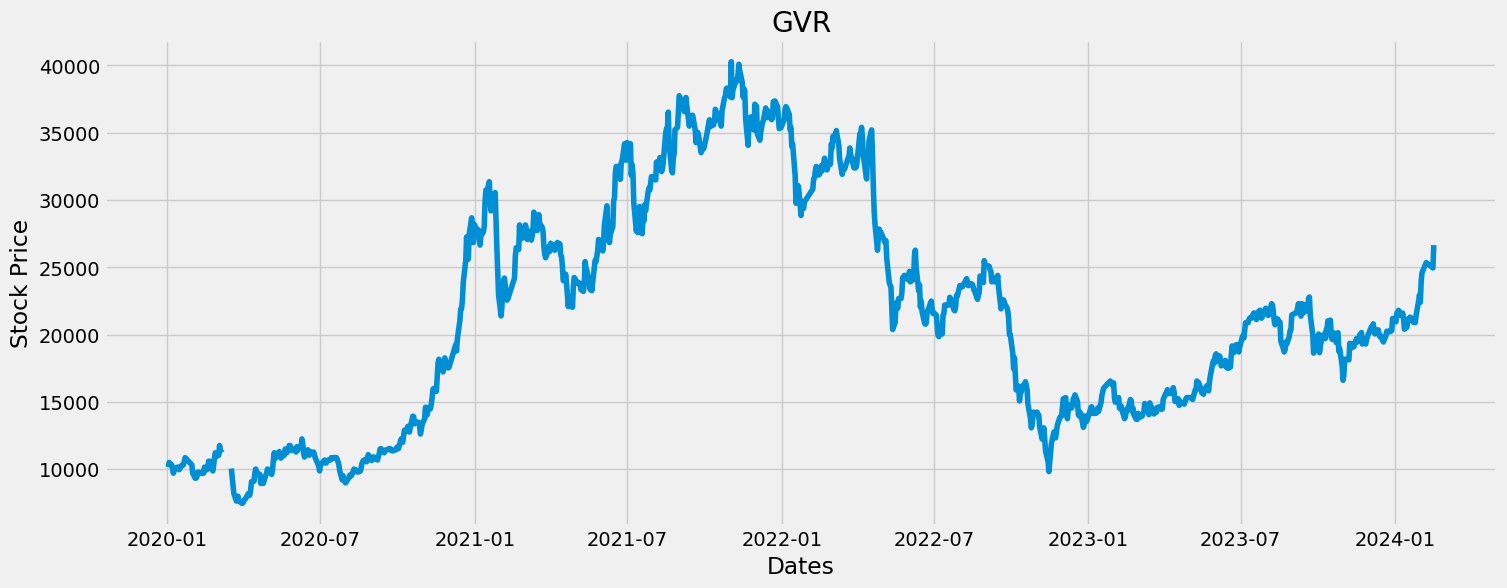

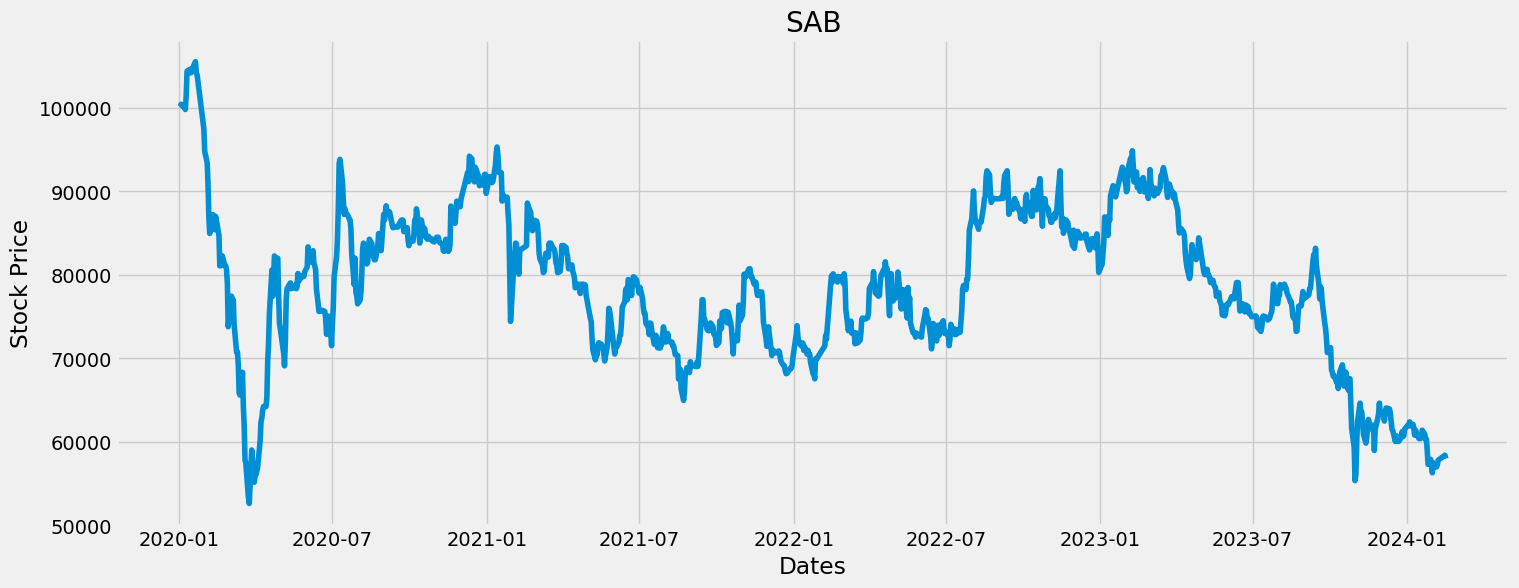

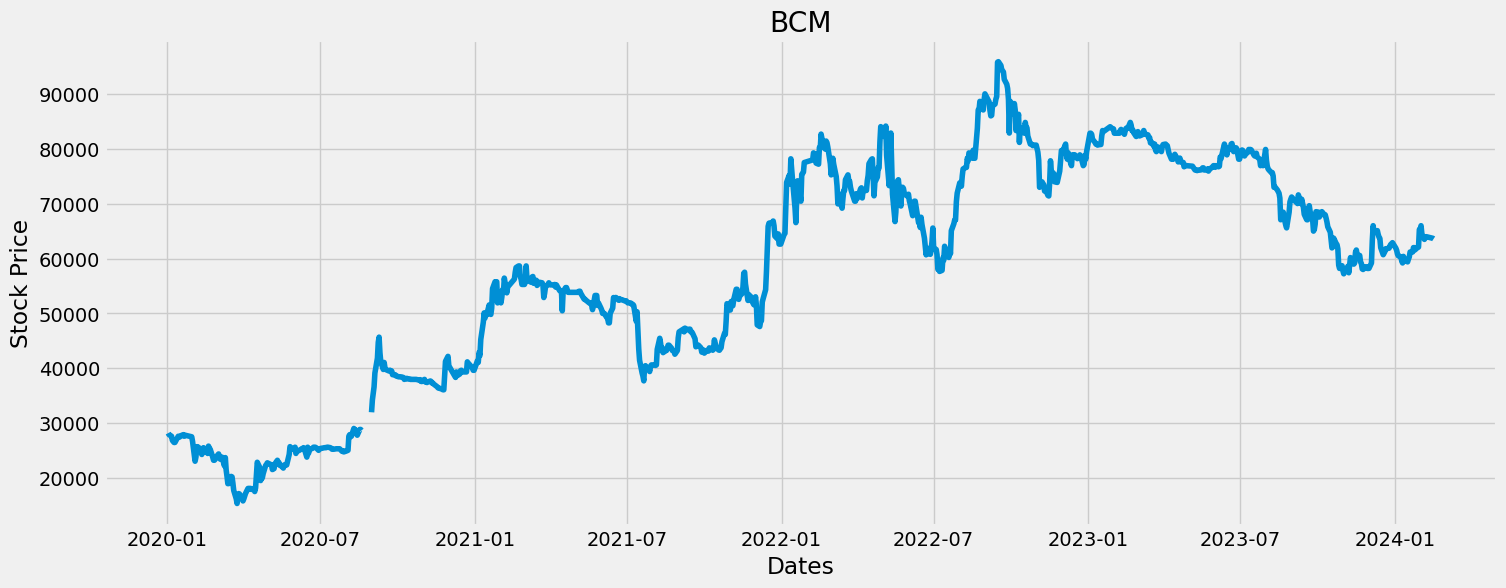

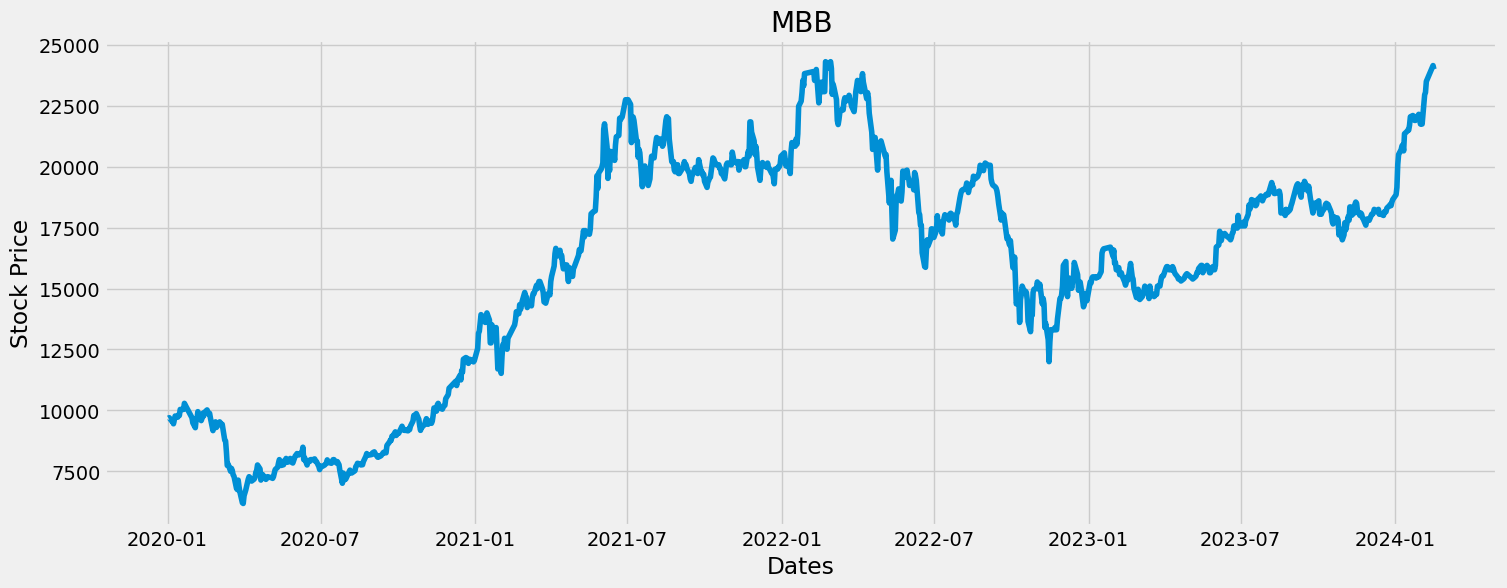

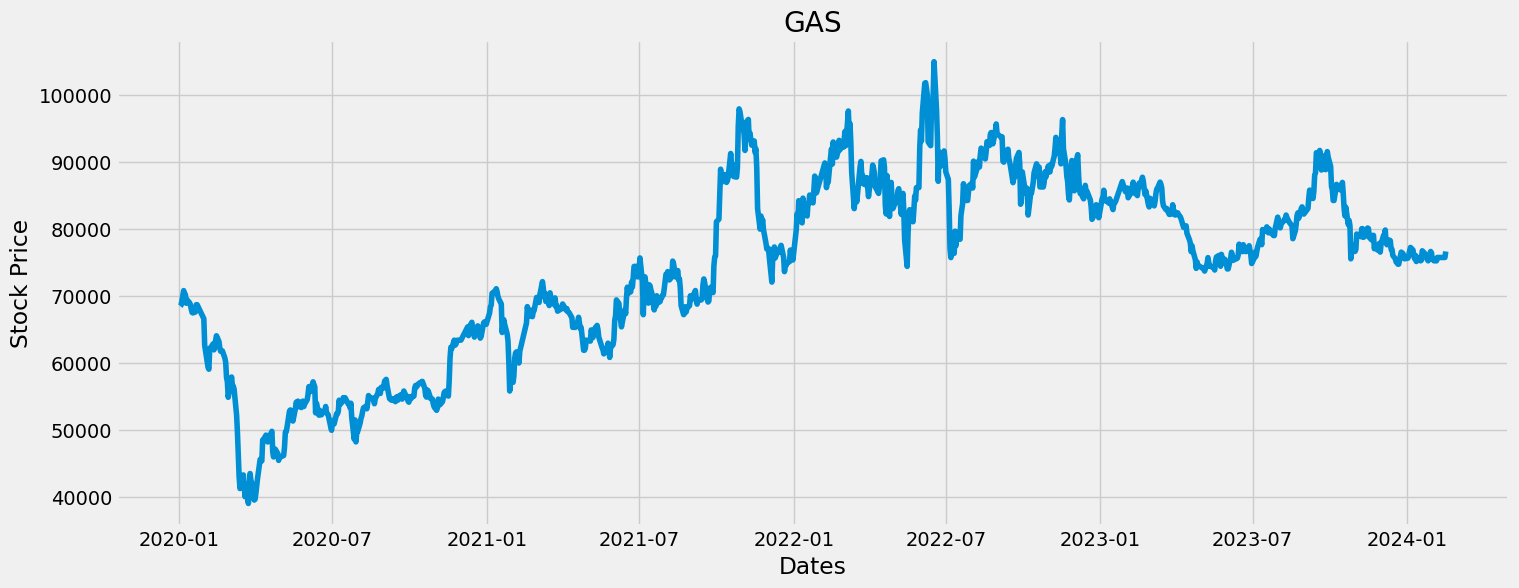

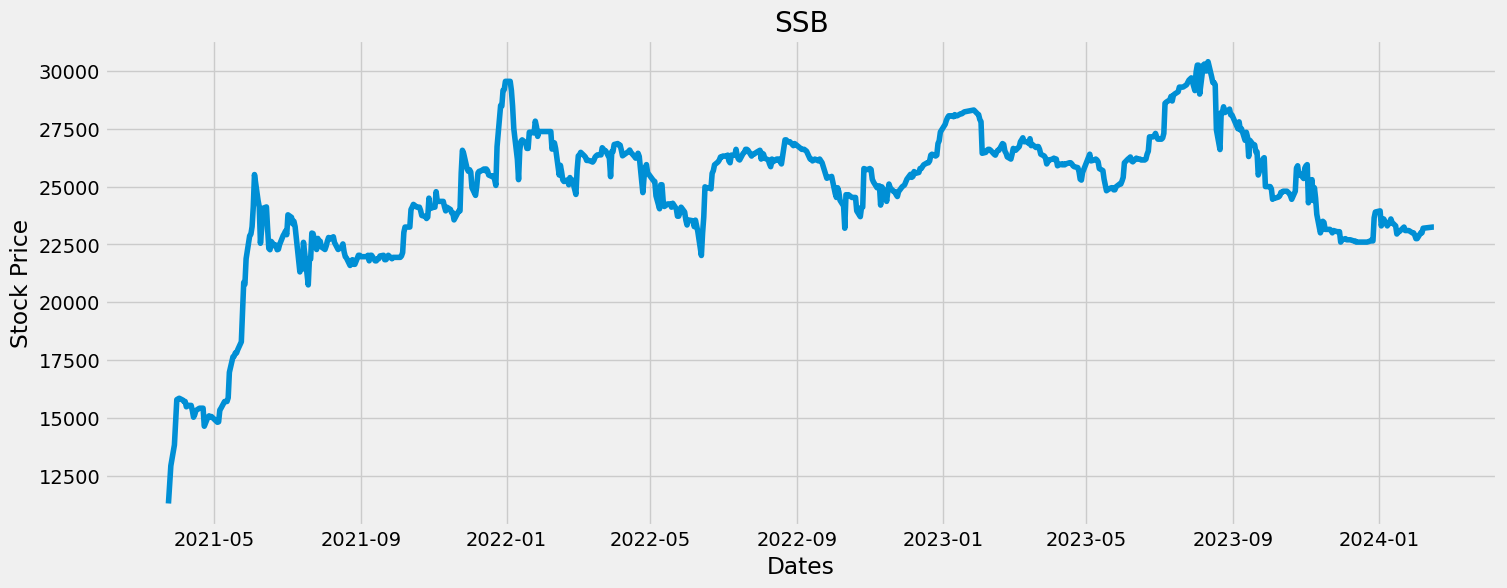

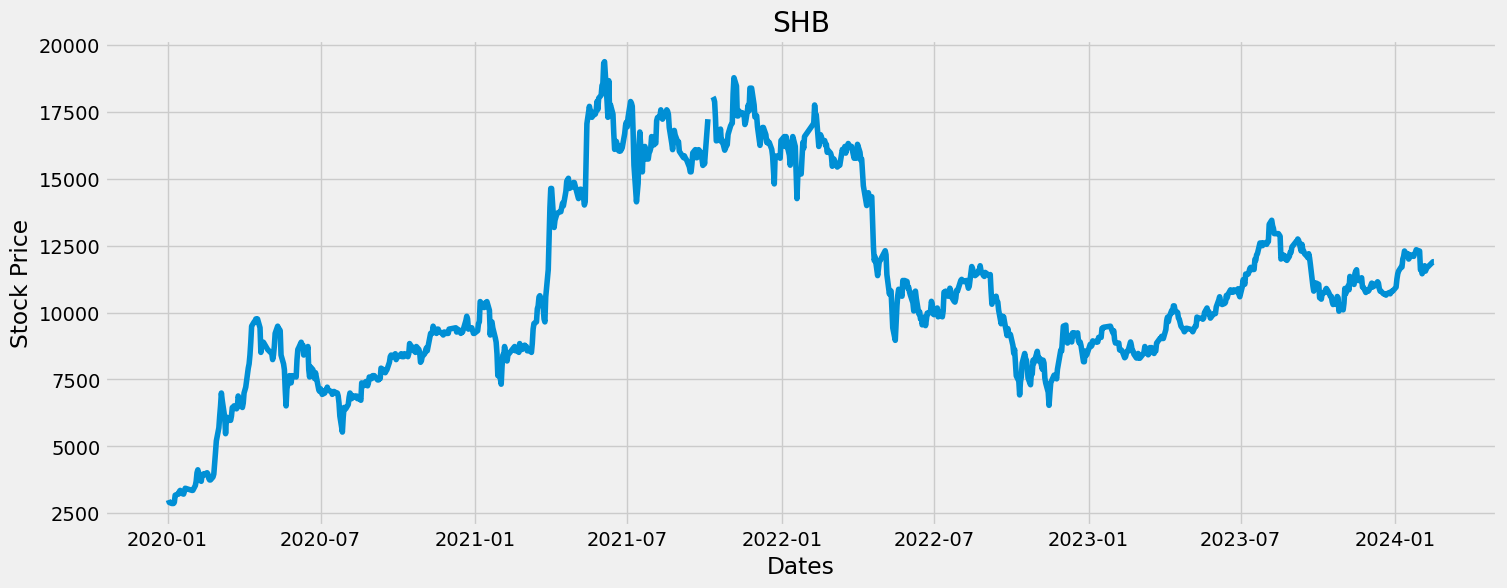

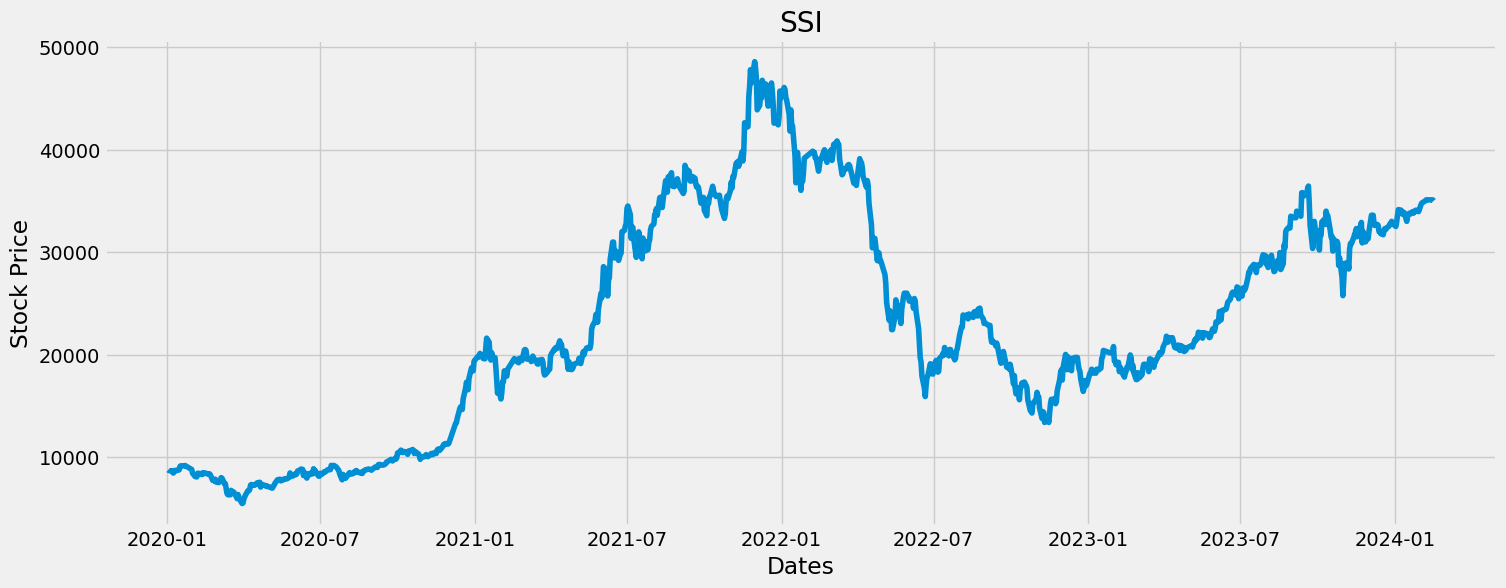

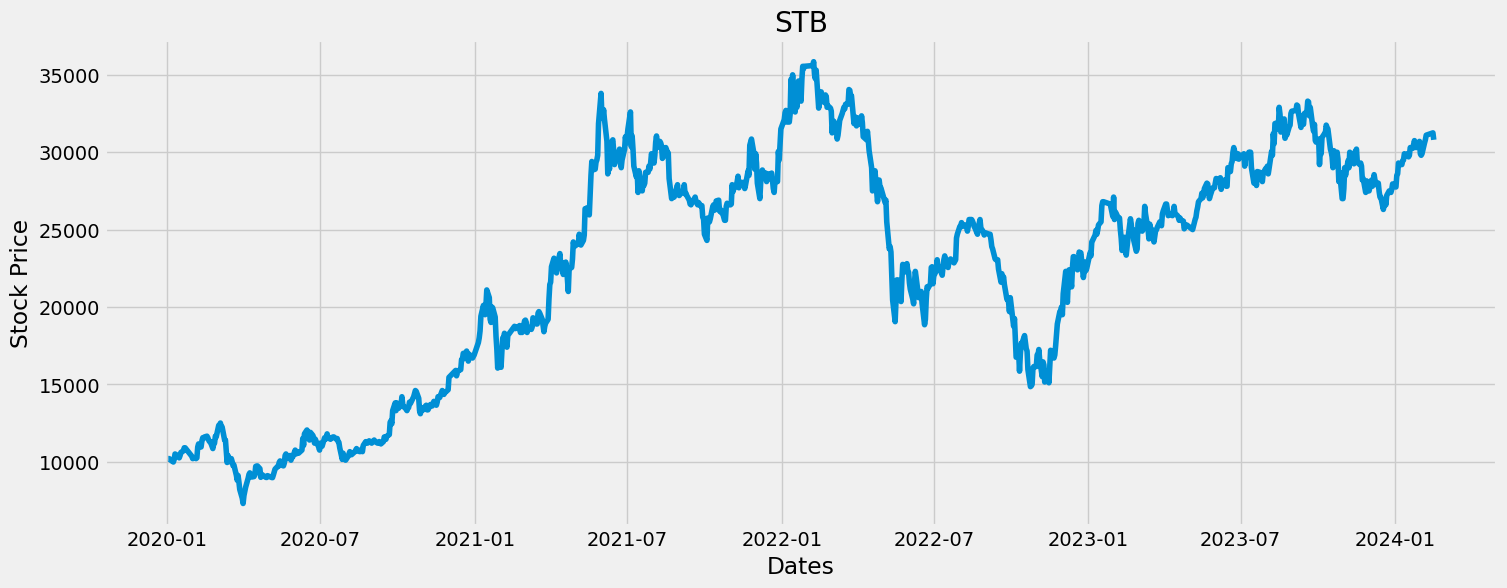

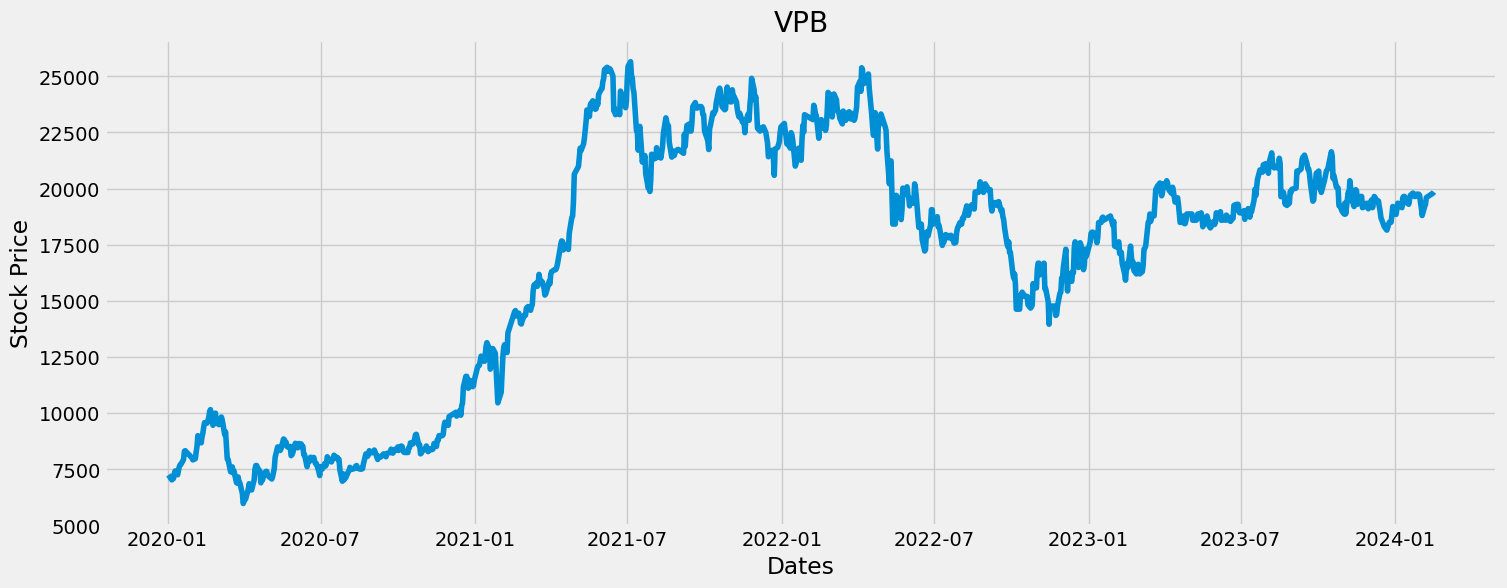

In [19]:
interactive_plot(df)

In [6]:
train_data = df[:996]
test_data = df[996:]

In [7]:
def ARIMA_pre(train_data, test_data, stock):
    train = train_data[stock].values
    test = test_data[stock].values

    # Sử dụng mô hình ARIMA
    history = [x for x in train]
    model_predictions = []
    N_test_observations = len(test)

    for time_point in range(N_test_observations):
        model = ARIMA(history, order= (4,1,0))
        model_fit = model.fit()
        output = model_fit.forecast()       
        yhat = output[0]
        model_predictions.append(yhat)
        true_test_value = test[time_point]
        history.append(true_test_value)
    MSE_error = mean_squared_error(test, model_predictions)
    print('Testing Mean Squared Error is {}'.format(MSE_error)) 
    return model_predictions

In [23]:
def model_plot(stock, model_predictions):
    plt.figure(figsize=(16,7))
    plt.grid(True)

    date = pd.to_datetime(test_data['Date'])

    plt.plot(date, model_predictions, color='green',linestyle='dashed',label='Predicted_Data')
    plt.plot(date, test_data[stock], color='red', label='Actual_Data')

    plt.title(stock)
    plt.xlabel('Date')
    plt.ylabel('Prices')
    plt.legend()
    plt.show()

Testing Mean Squared Error is 188723.8479395231


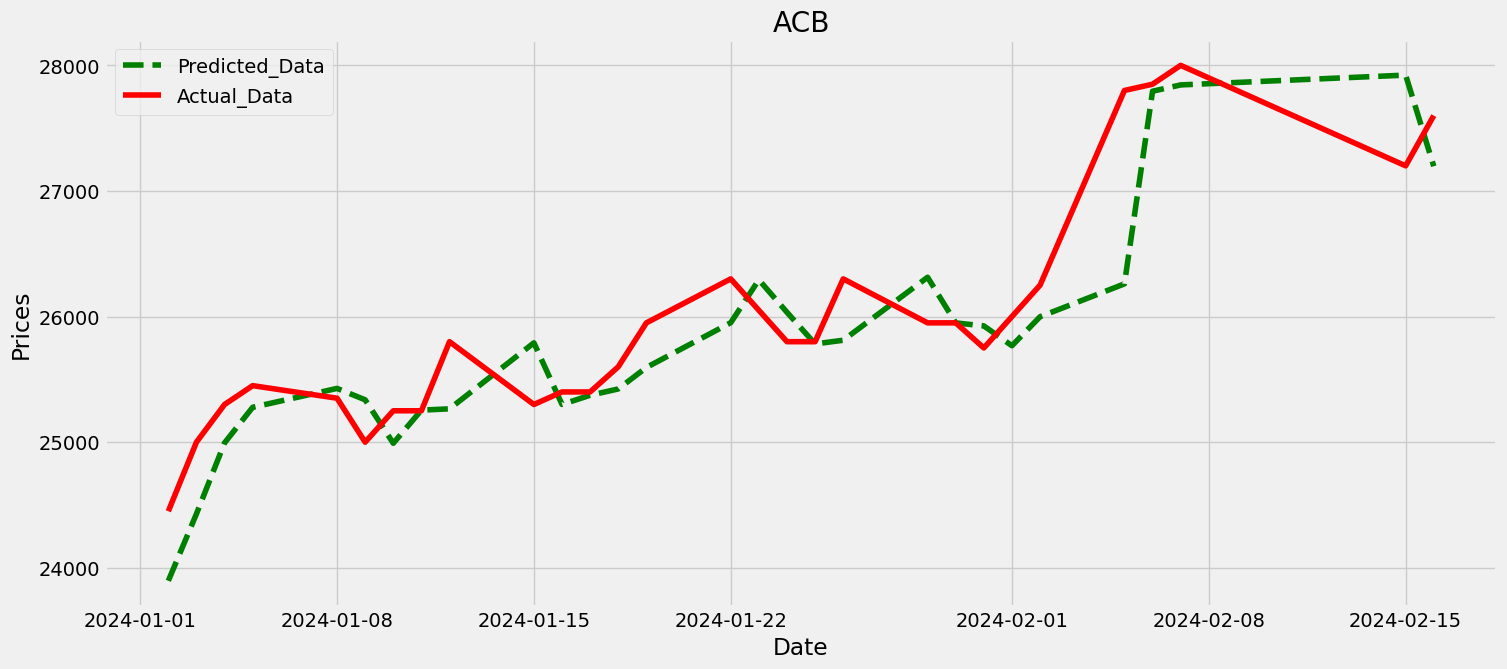

Testing Mean Squared Error is 464134.3580203315


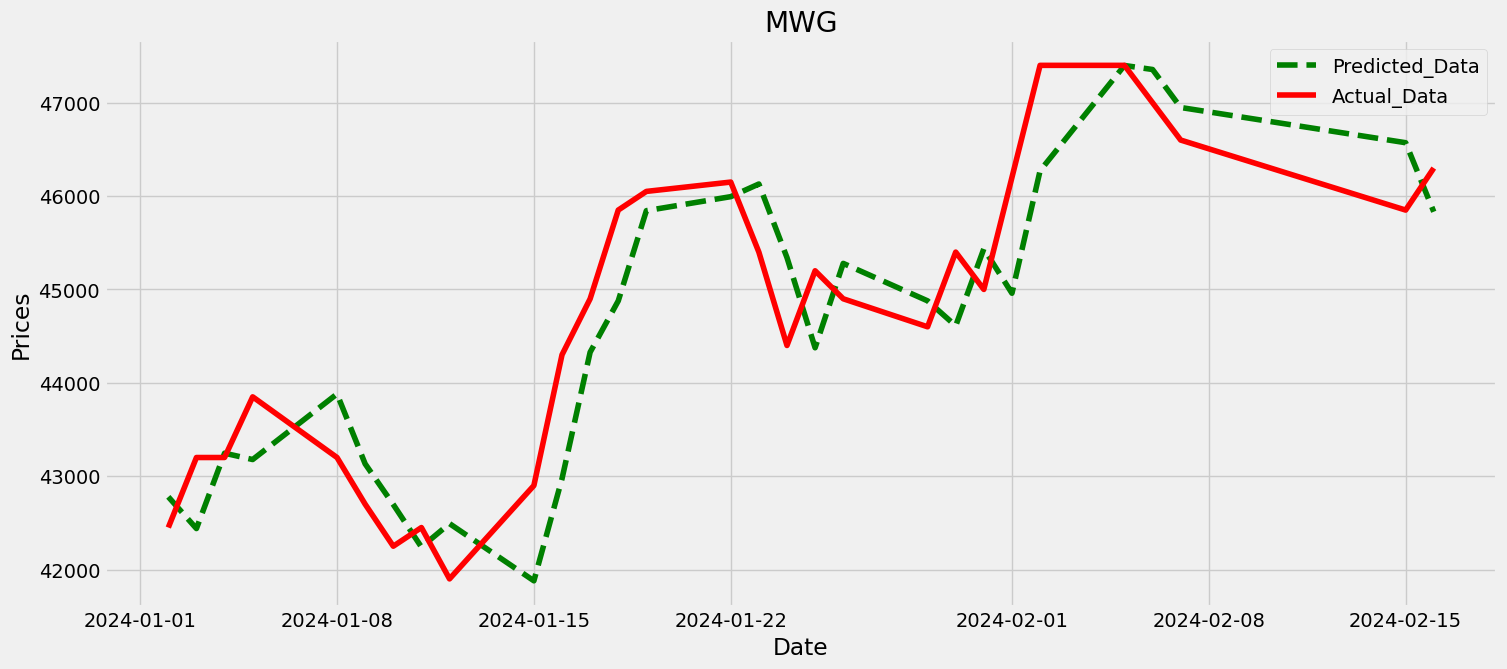

Testing Mean Squared Error is 773393.8252975781


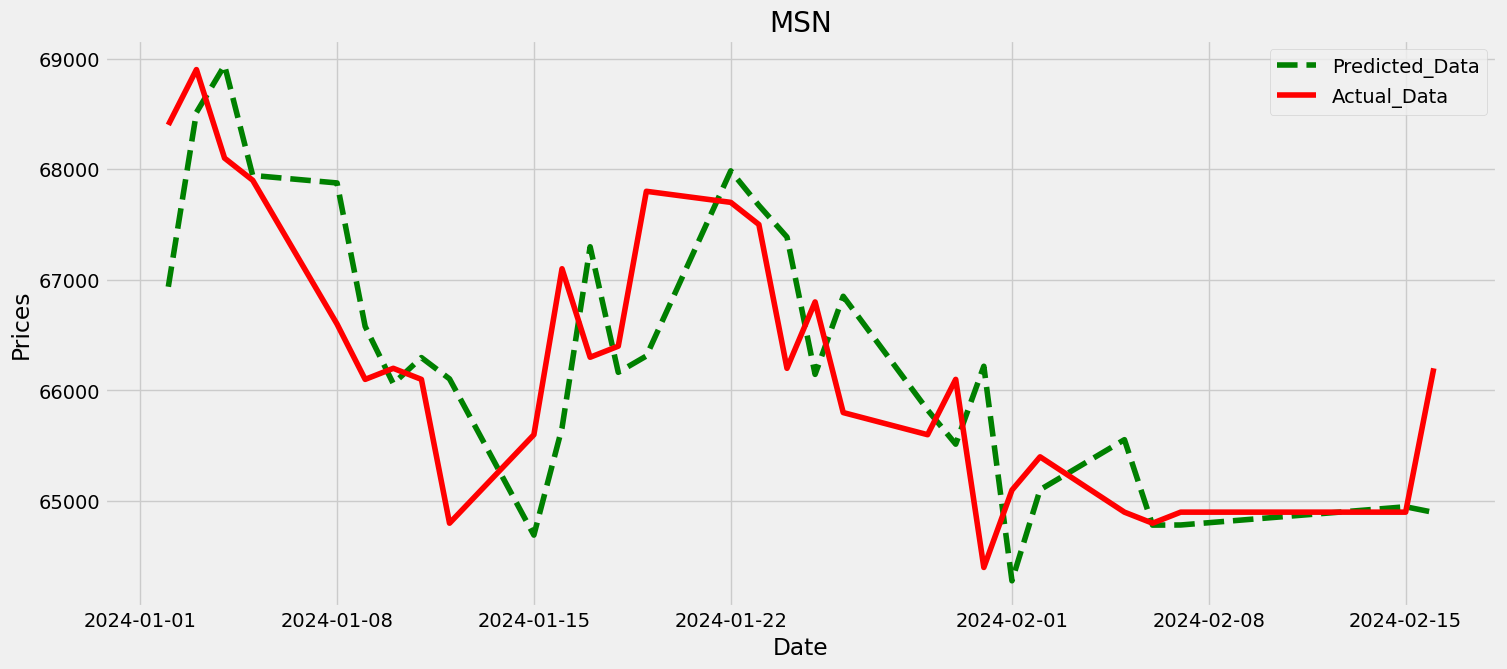

Testing Mean Squared Error is 692492.0085068578


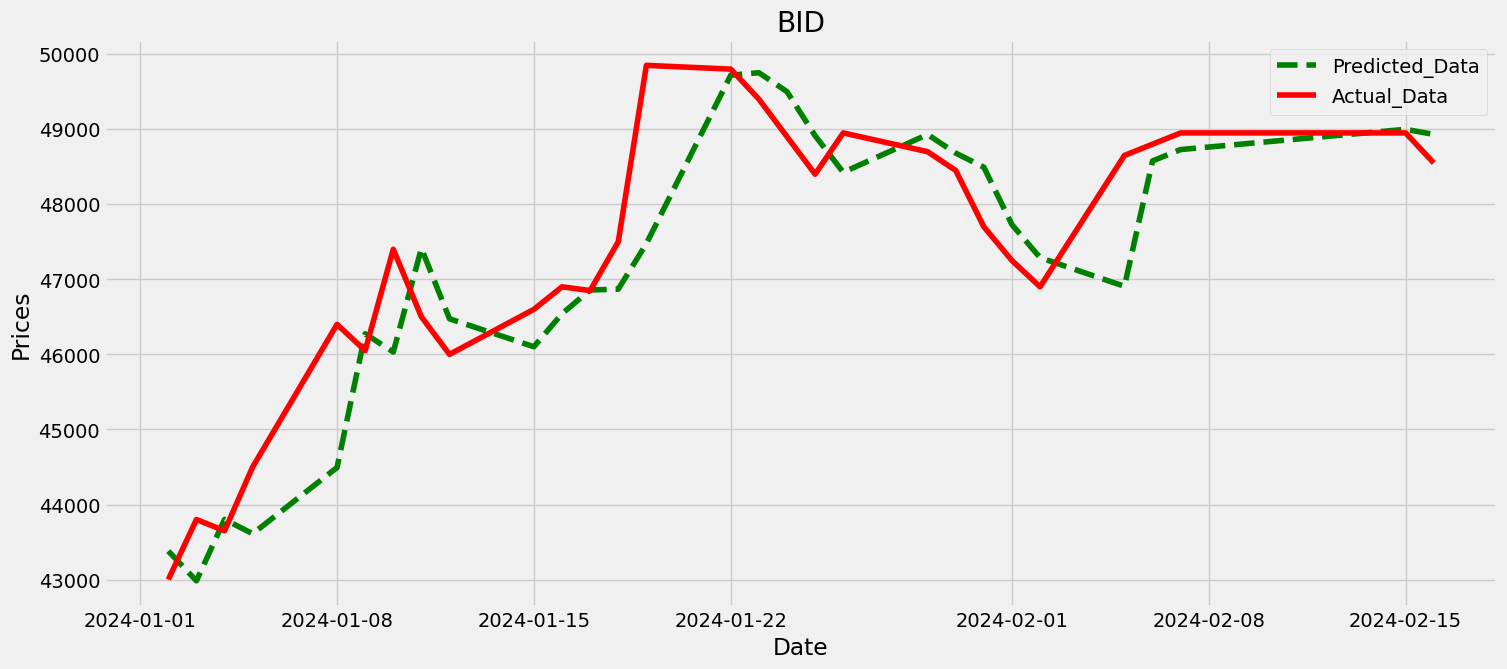

Testing Mean Squared Error is 94108.32664224665


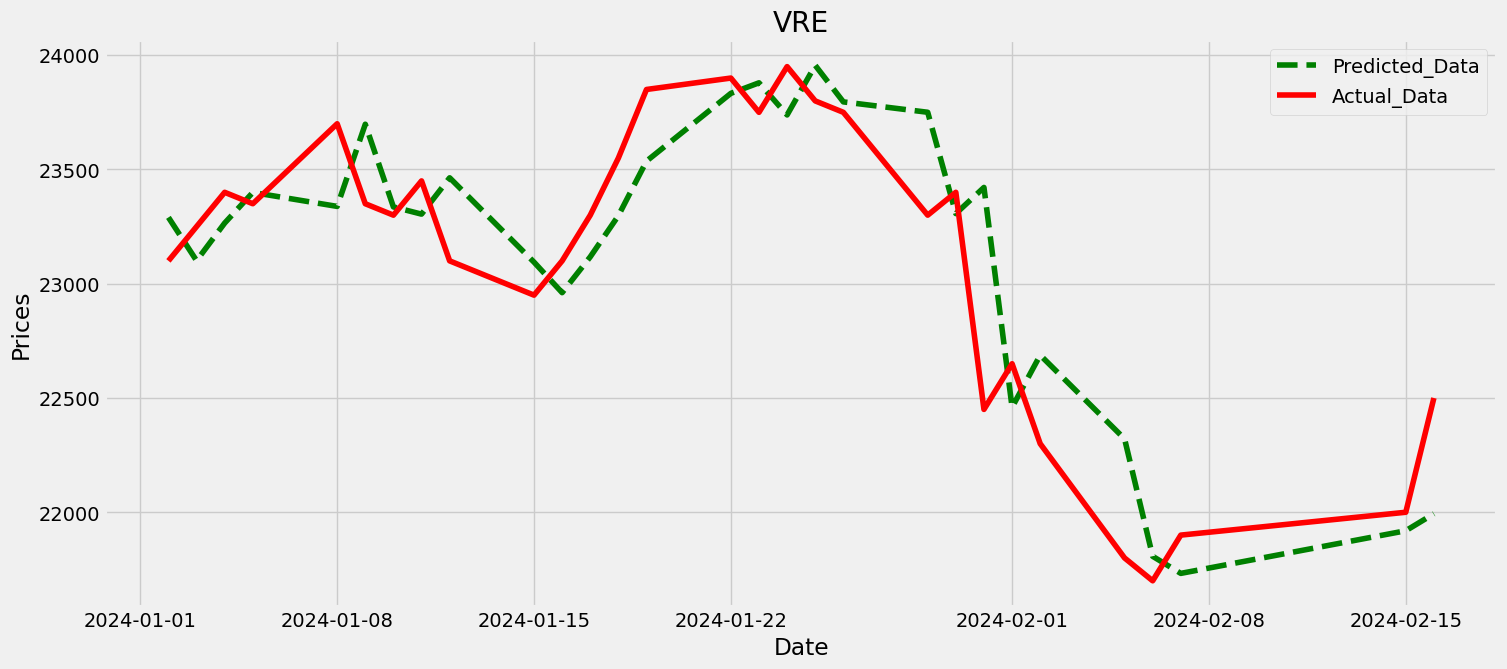

Testing Mean Squared Error is 9513.166680196538


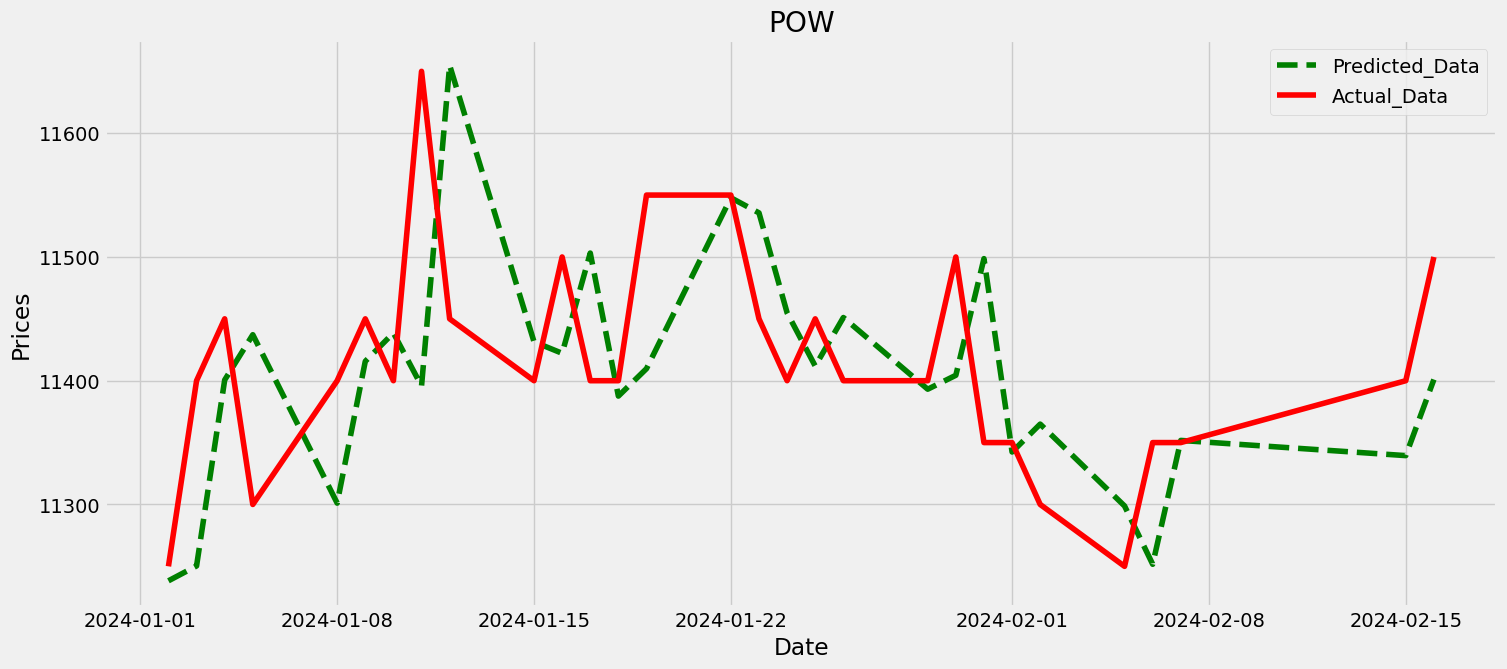

Testing Mean Squared Error is 70166.65330508868


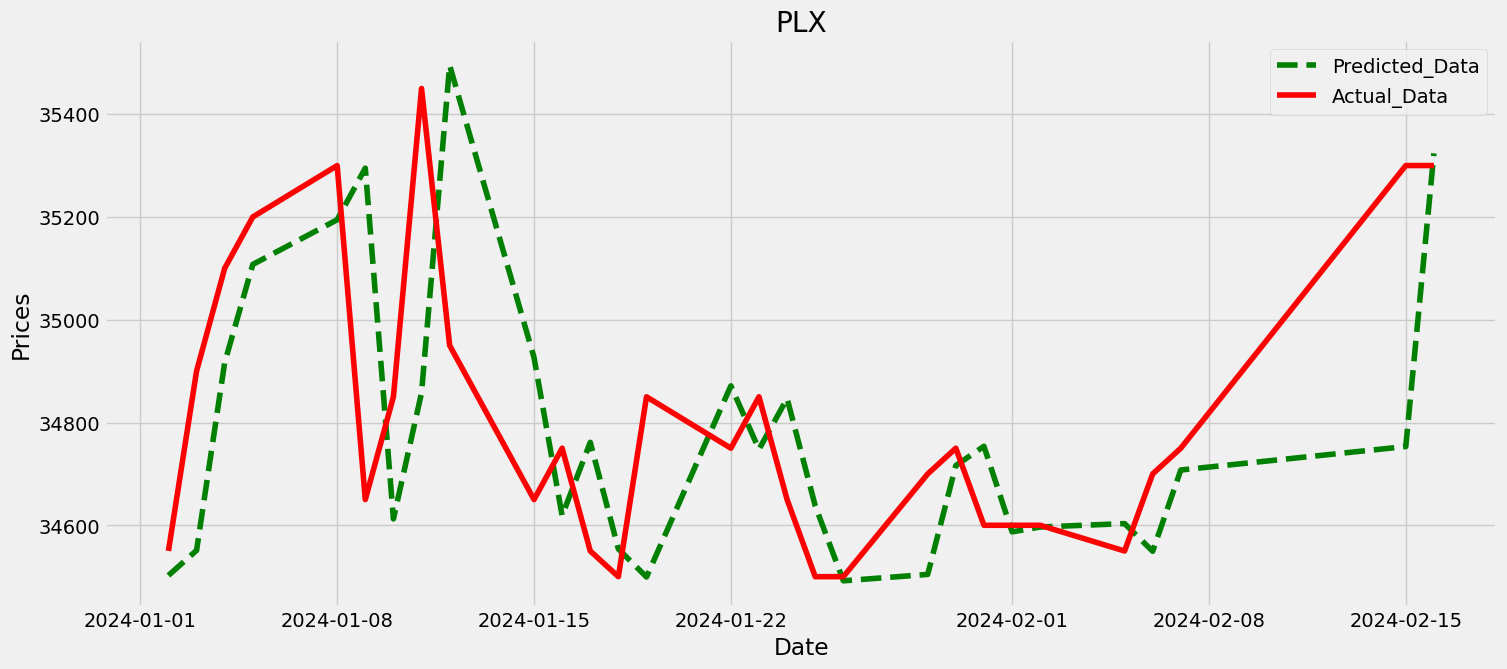

Testing Mean Squared Error is 70023.97718305807


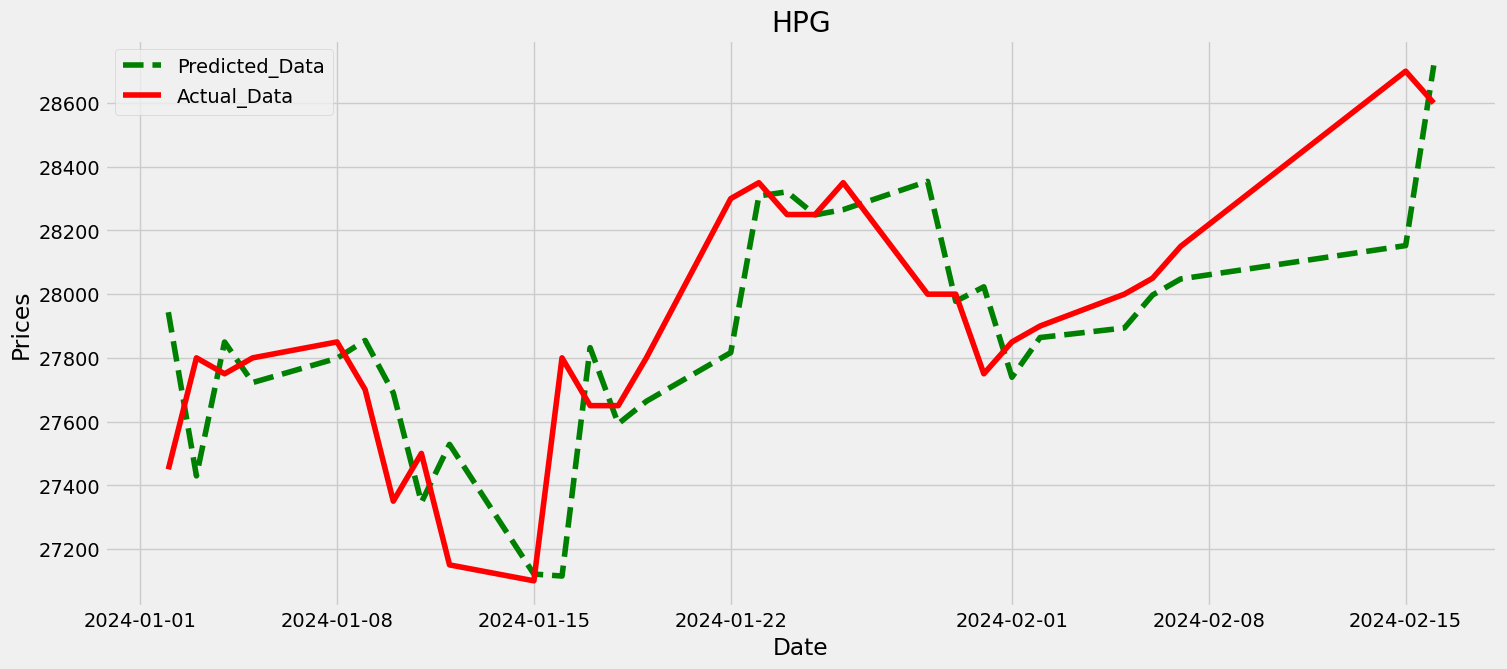

Testing Mean Squared Error is 361523.3523209511


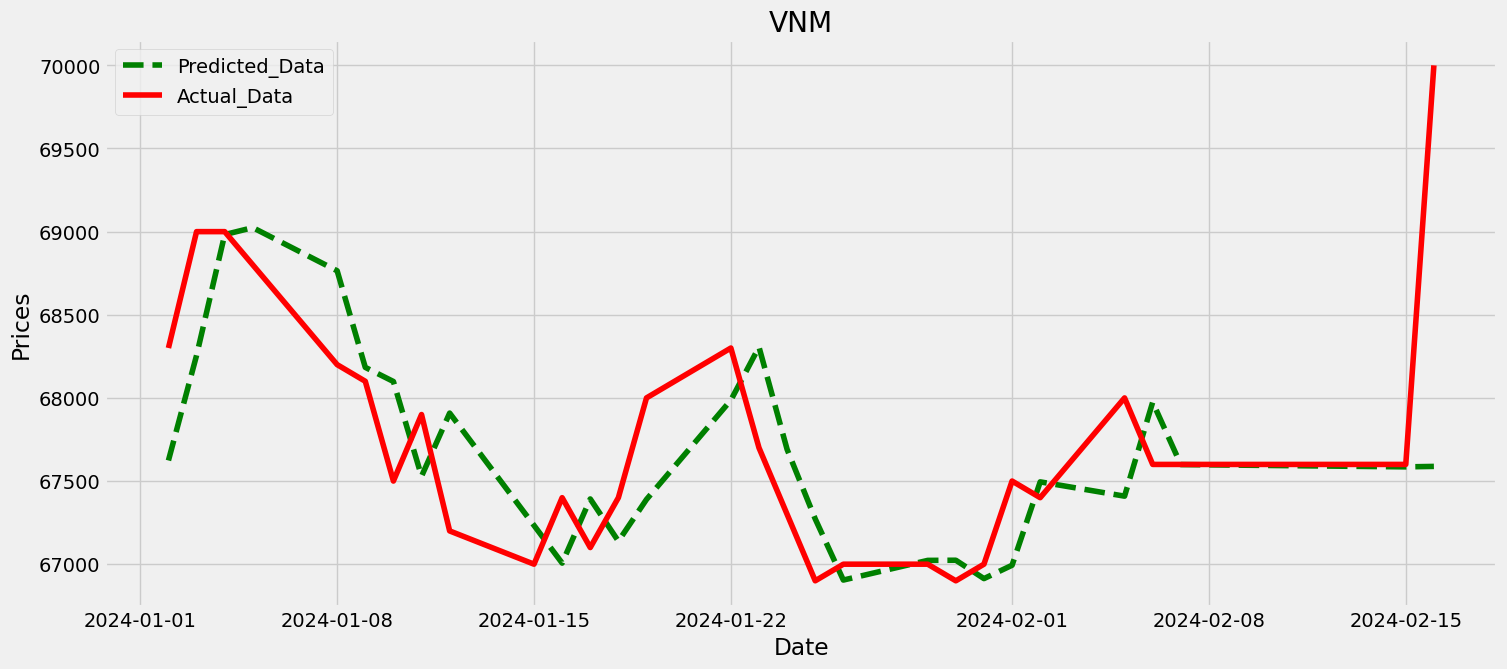

Testing Mean Squared Error is 256847.10193508805


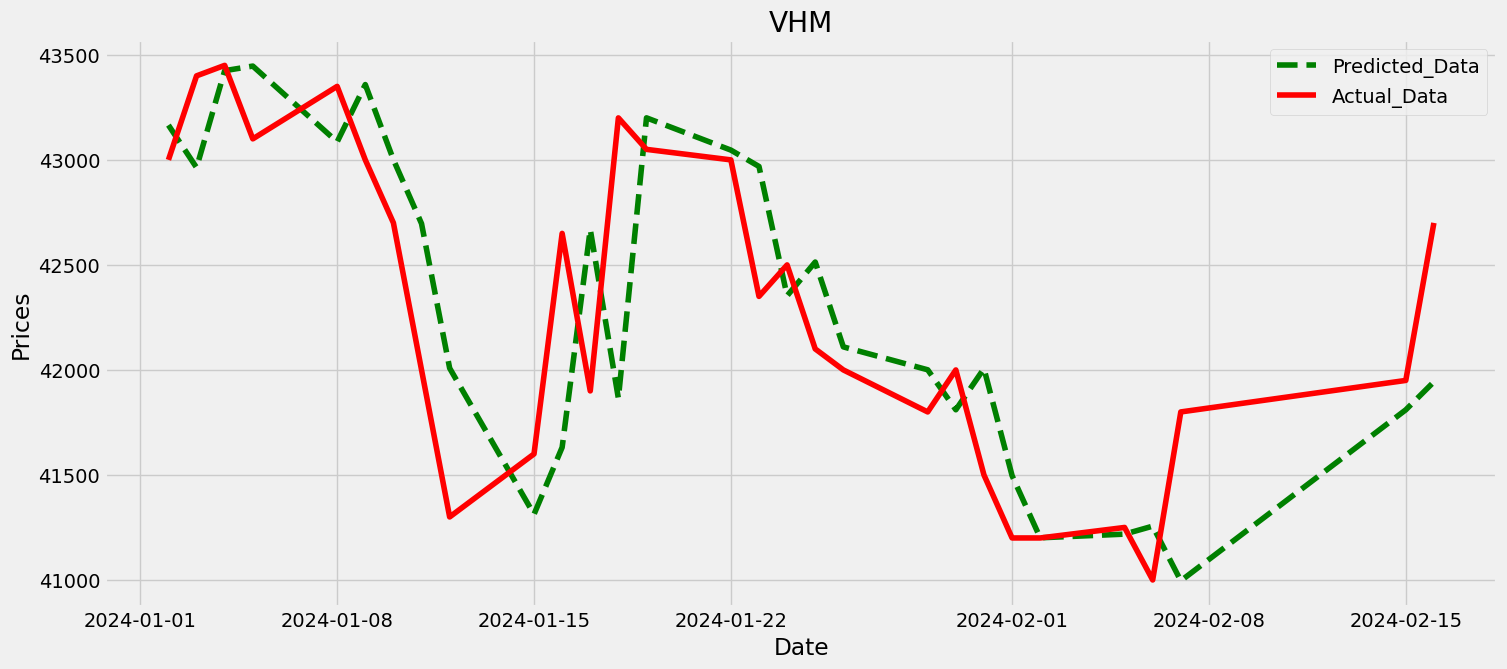

Testing Mean Squared Error is 321885.4097653596


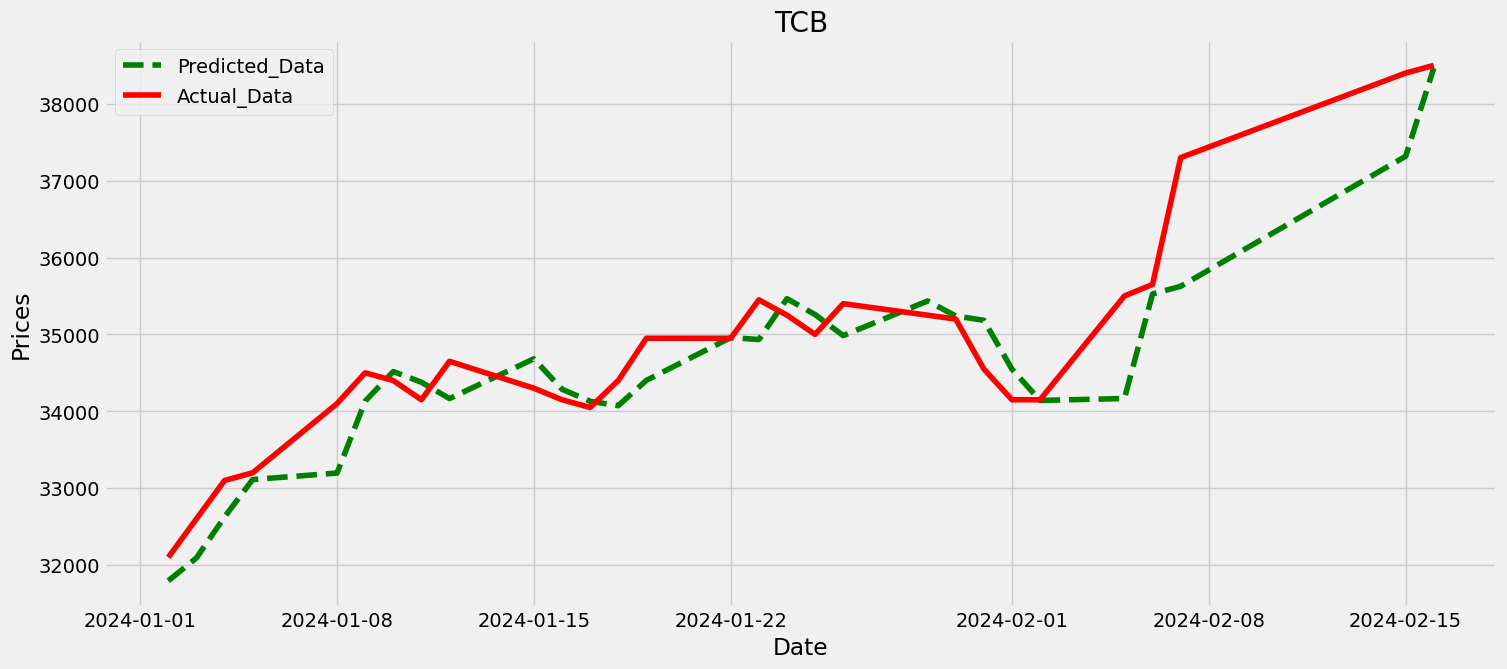

Testing Mean Squared Error is 64256.654452994226


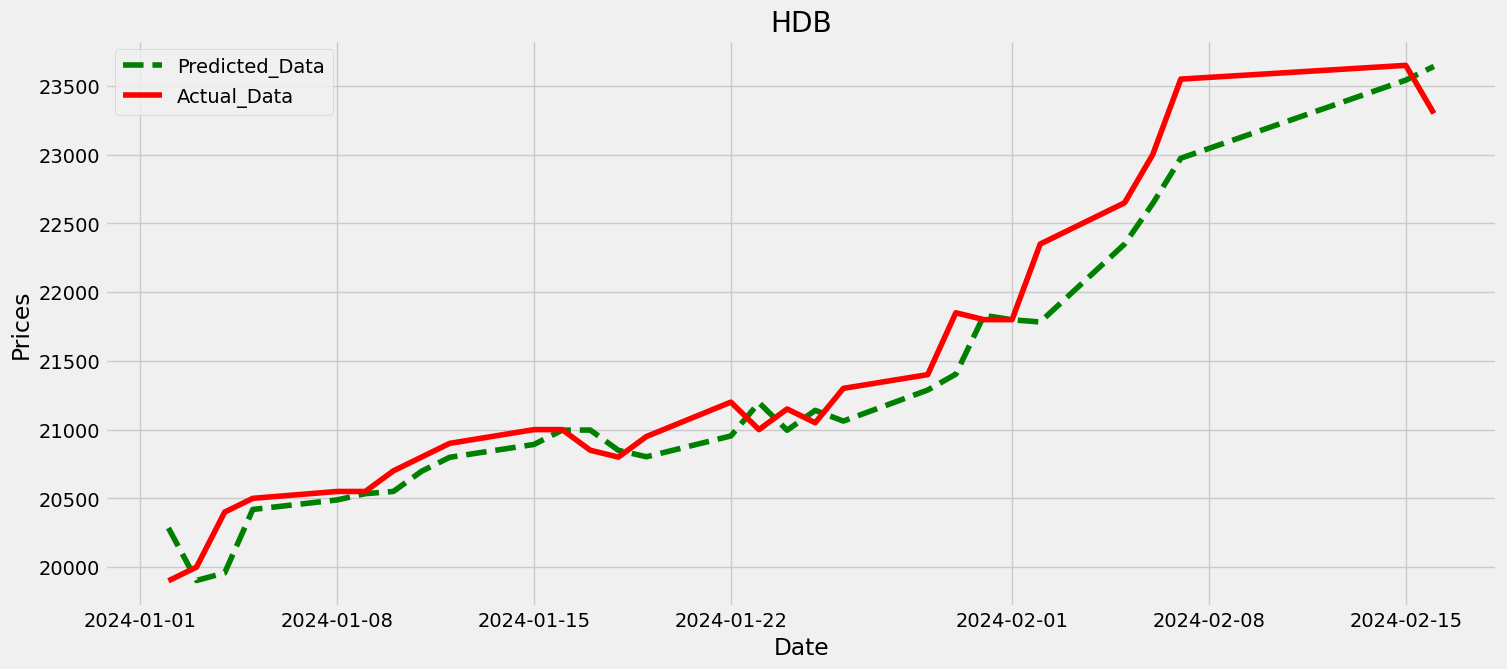

Testing Mean Squared Error is 70602.84426782739


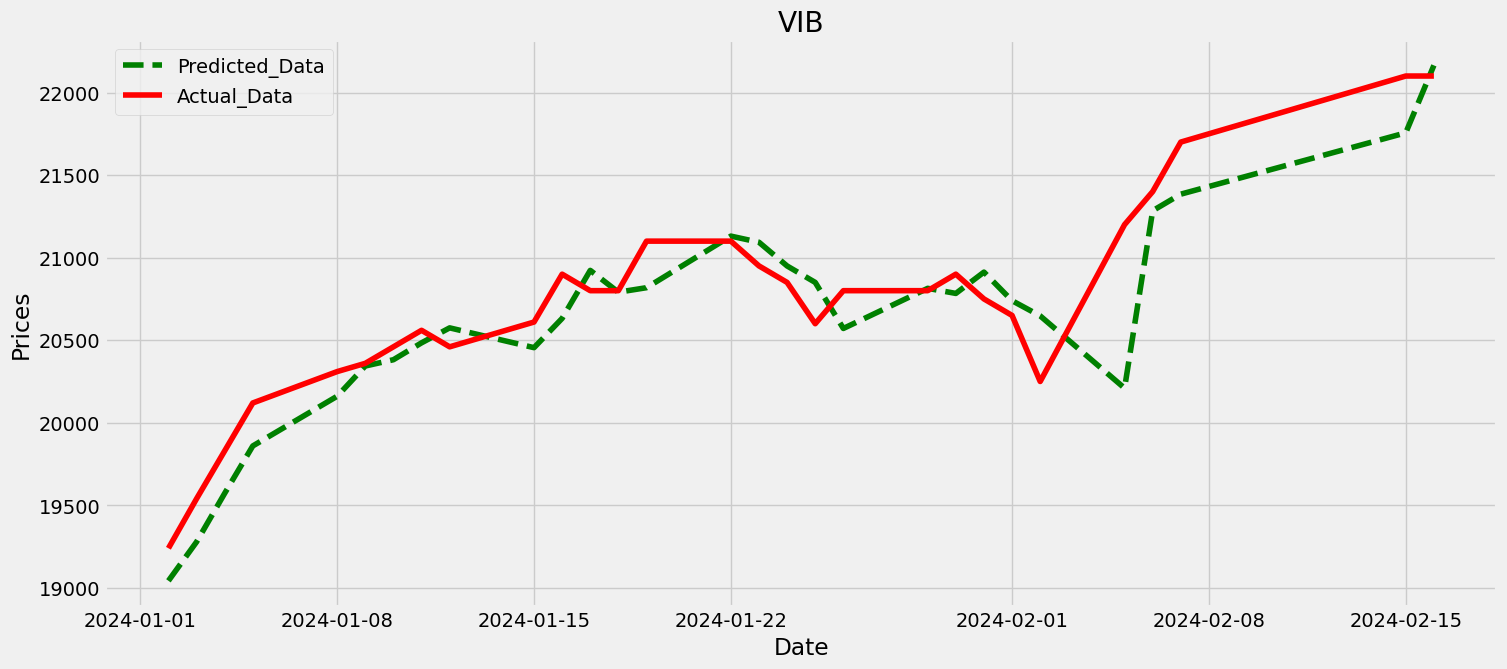

Testing Mean Squared Error is 1194882.026219428


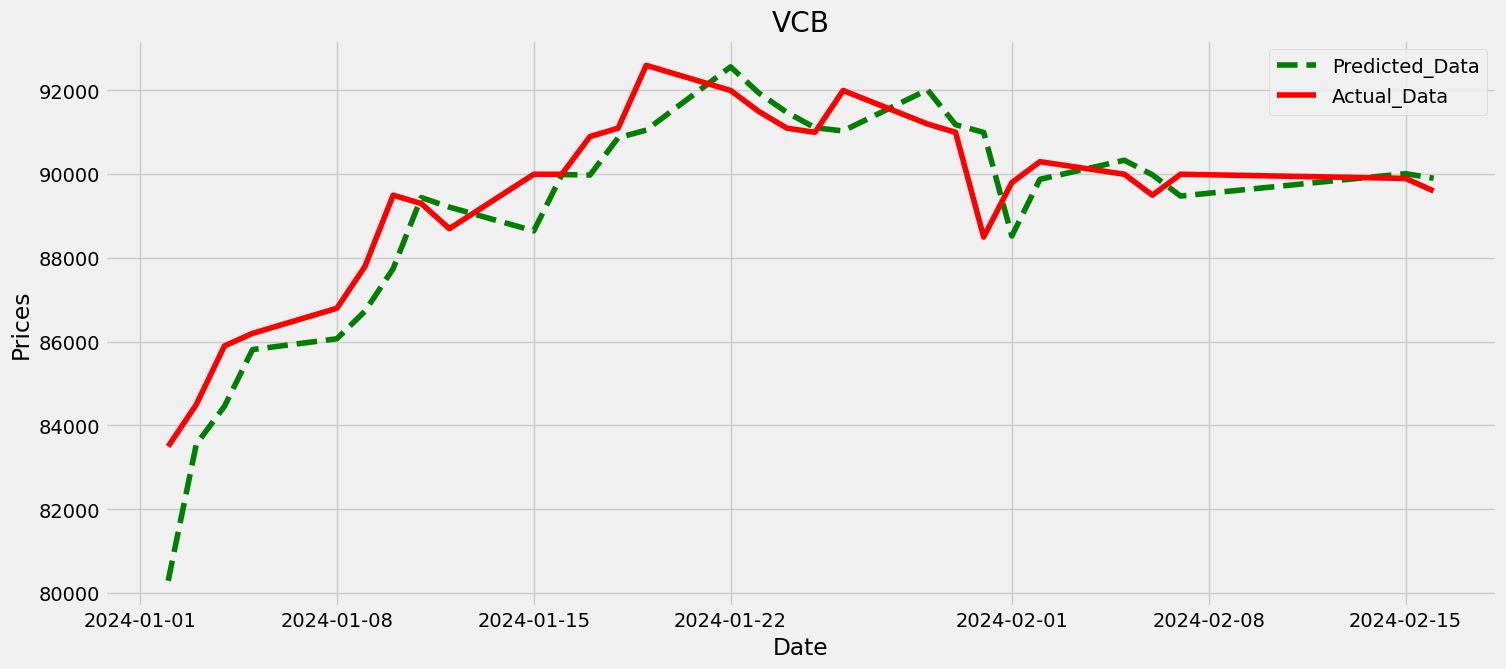

Testing Mean Squared Error is 398520.8569344968


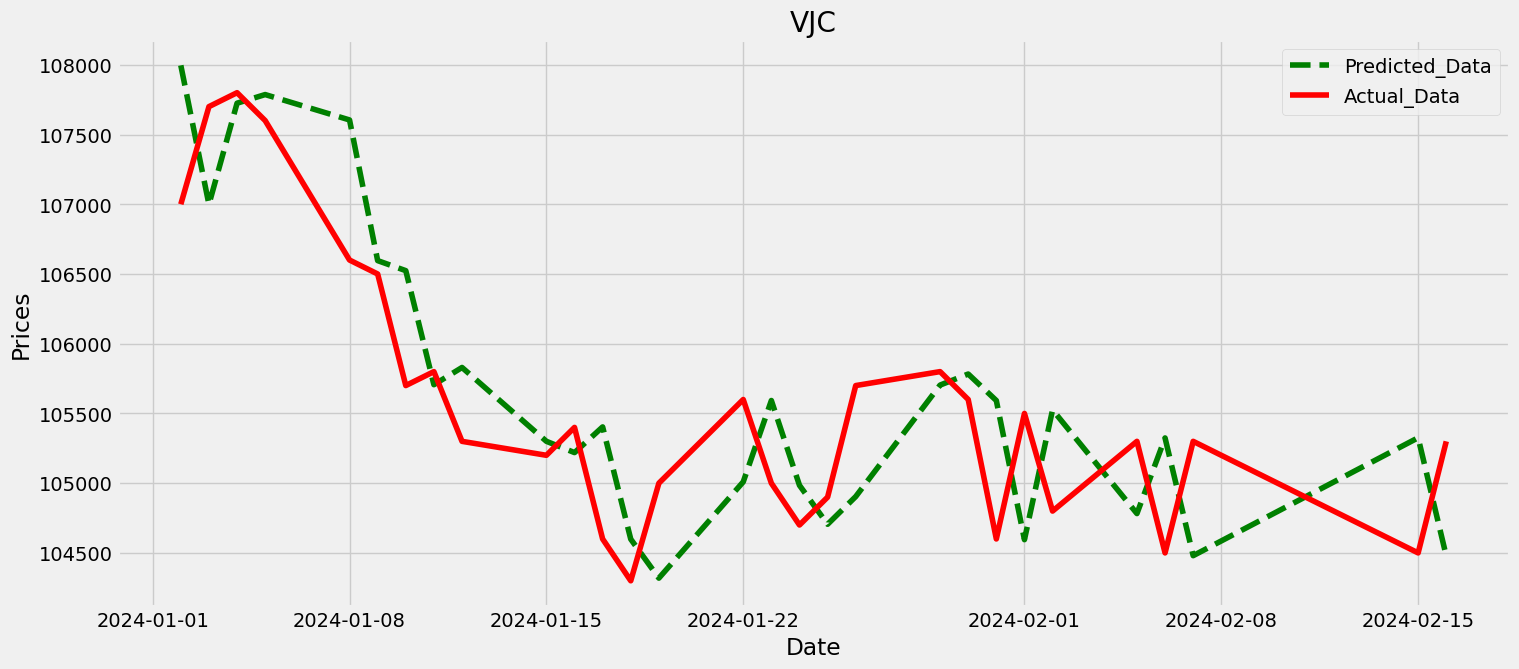

Testing Mean Squared Error is 121755.13123886556


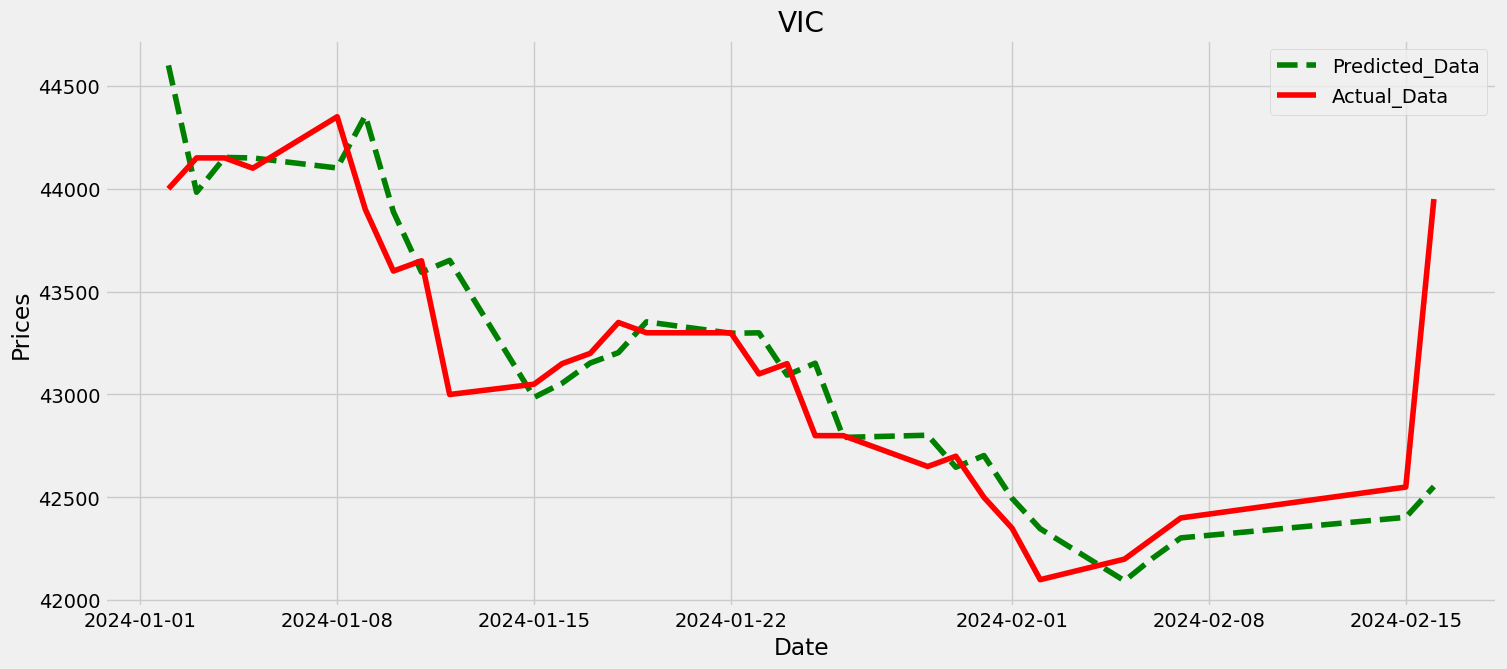

Testing Mean Squared Error is 1238686.80836625


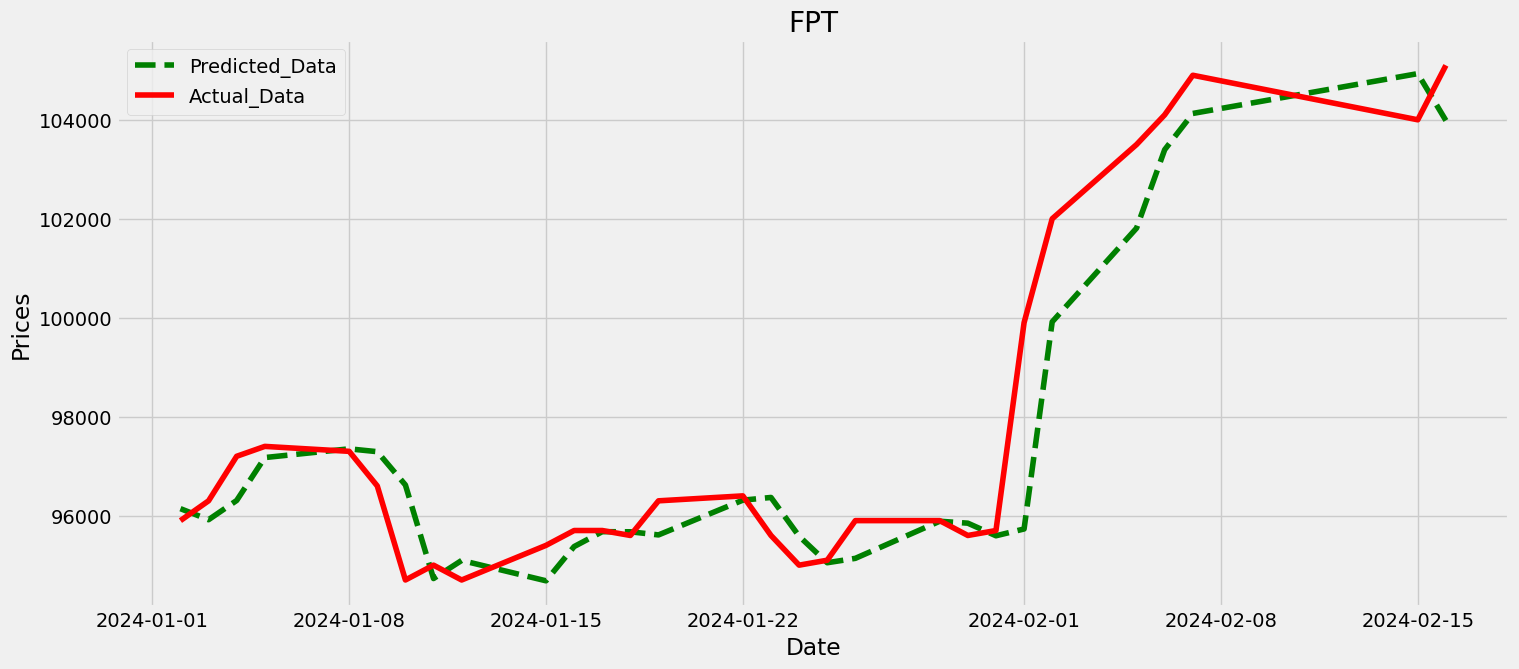

Testing Mean Squared Error is 422607.7588932785


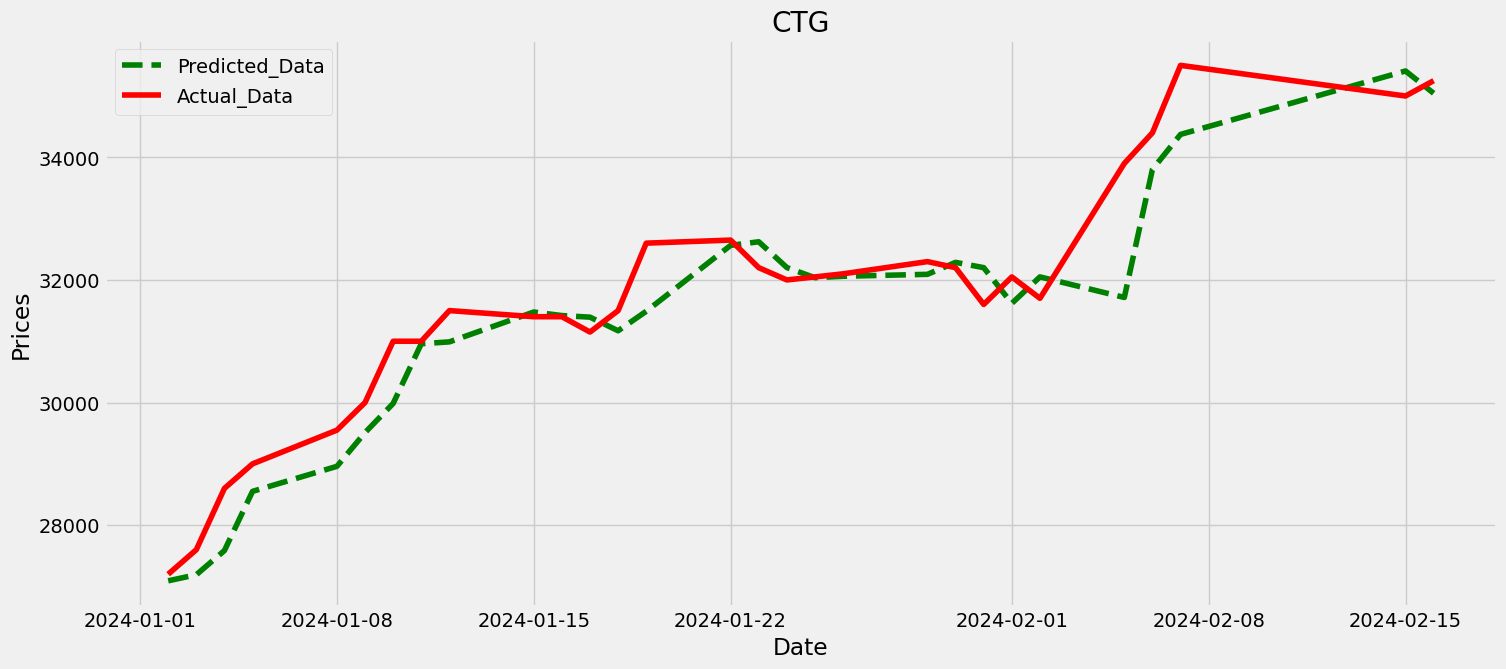

Testing Mean Squared Error is 78806.64653219754


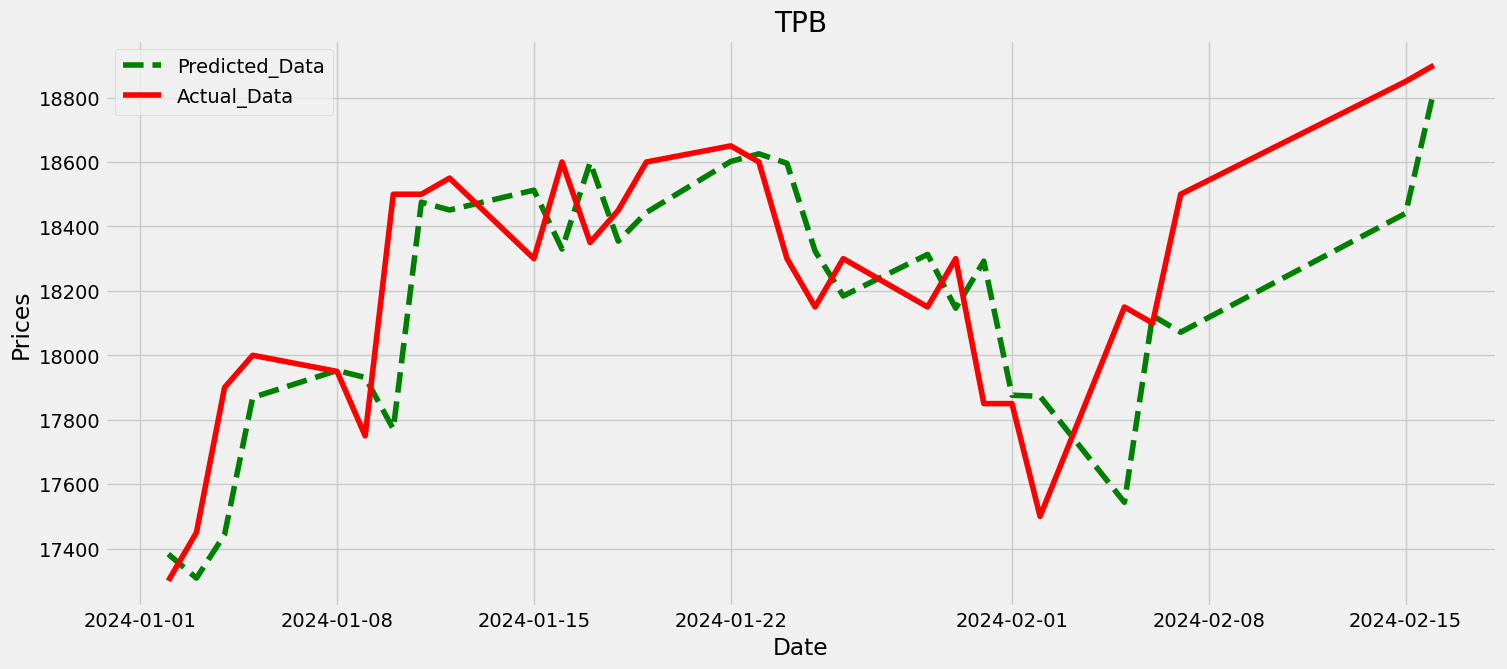

Testing Mean Squared Error is 207866.58176187542


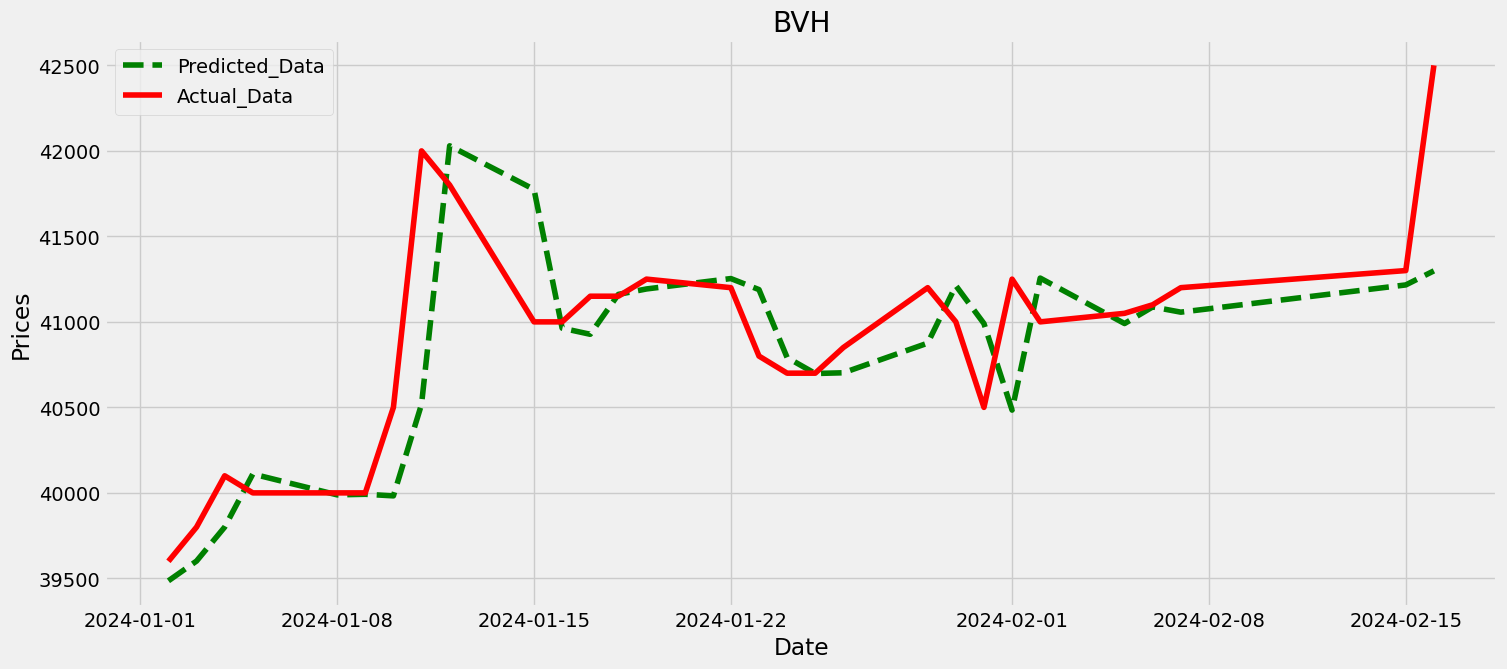

Testing Mean Squared Error is 348304.07513463305


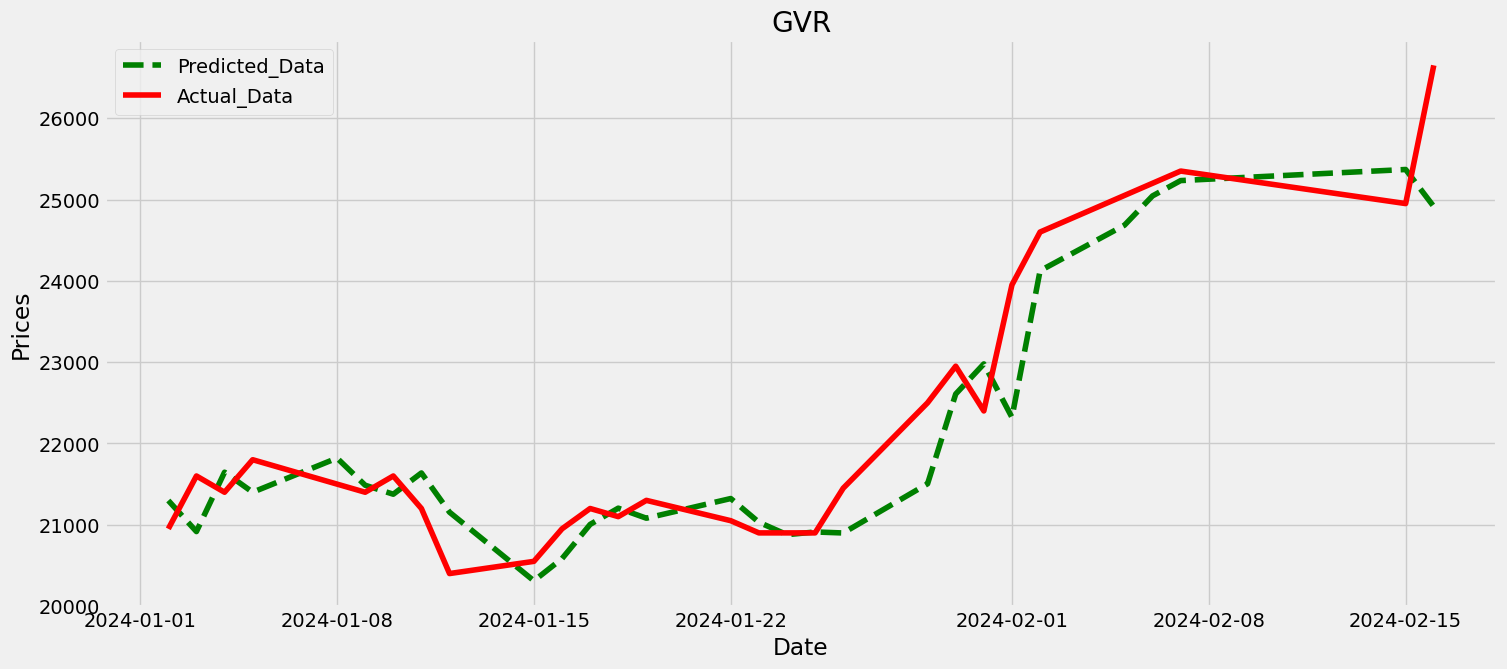

Testing Mean Squared Error is 432722.29833954806


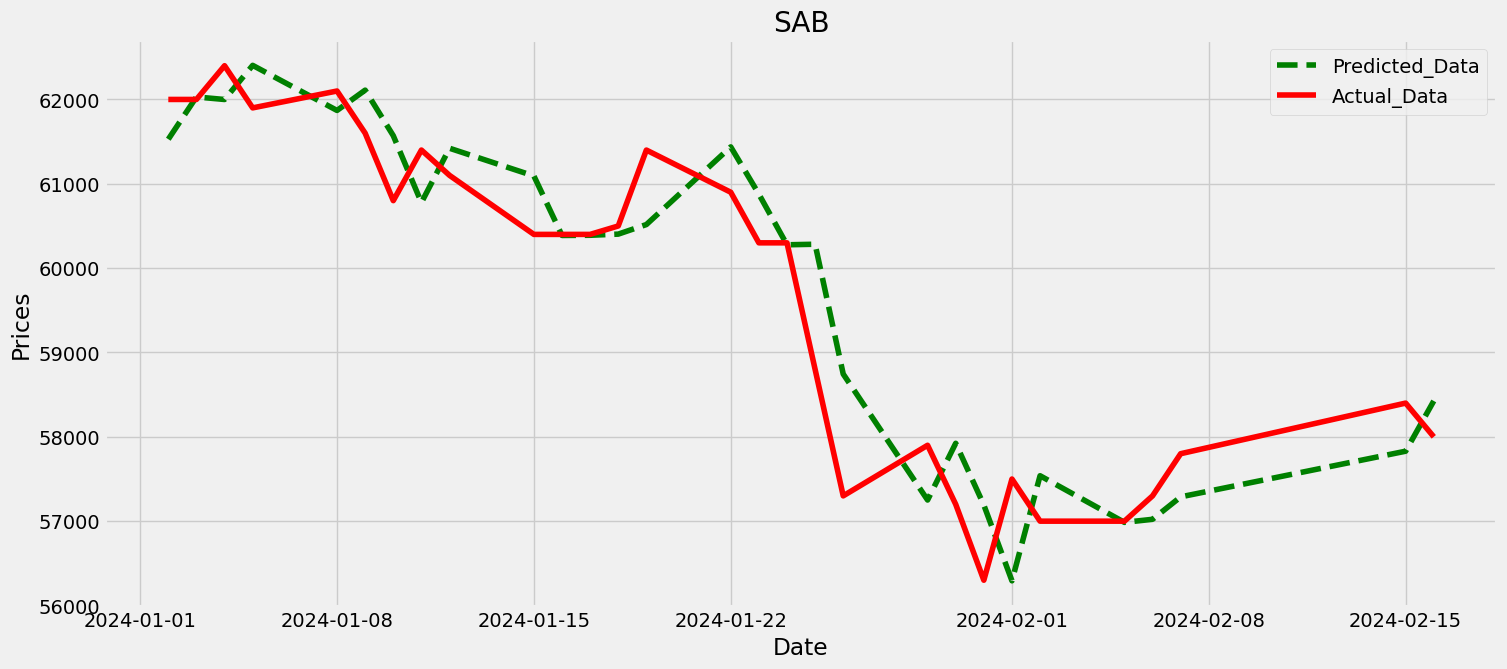

Testing Mean Squared Error is 695035.9049503477


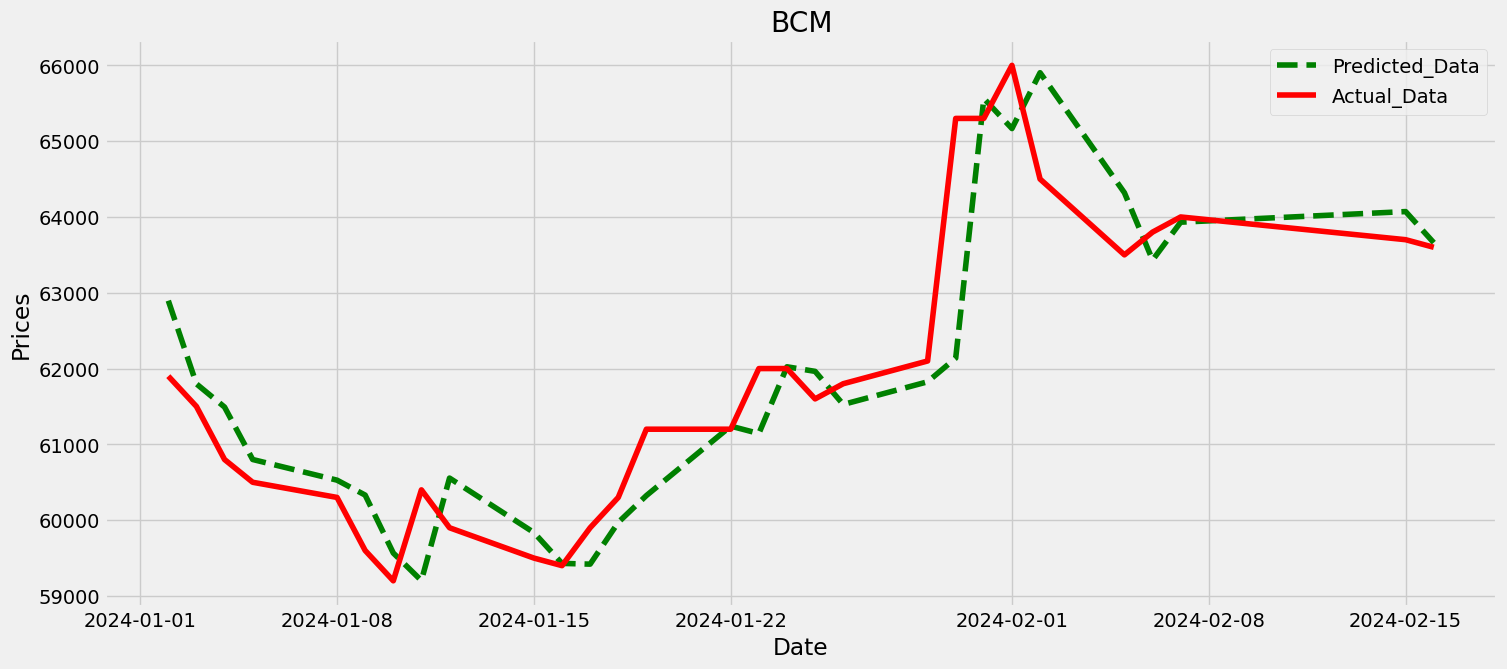

Testing Mean Squared Error is 151010.38012744582


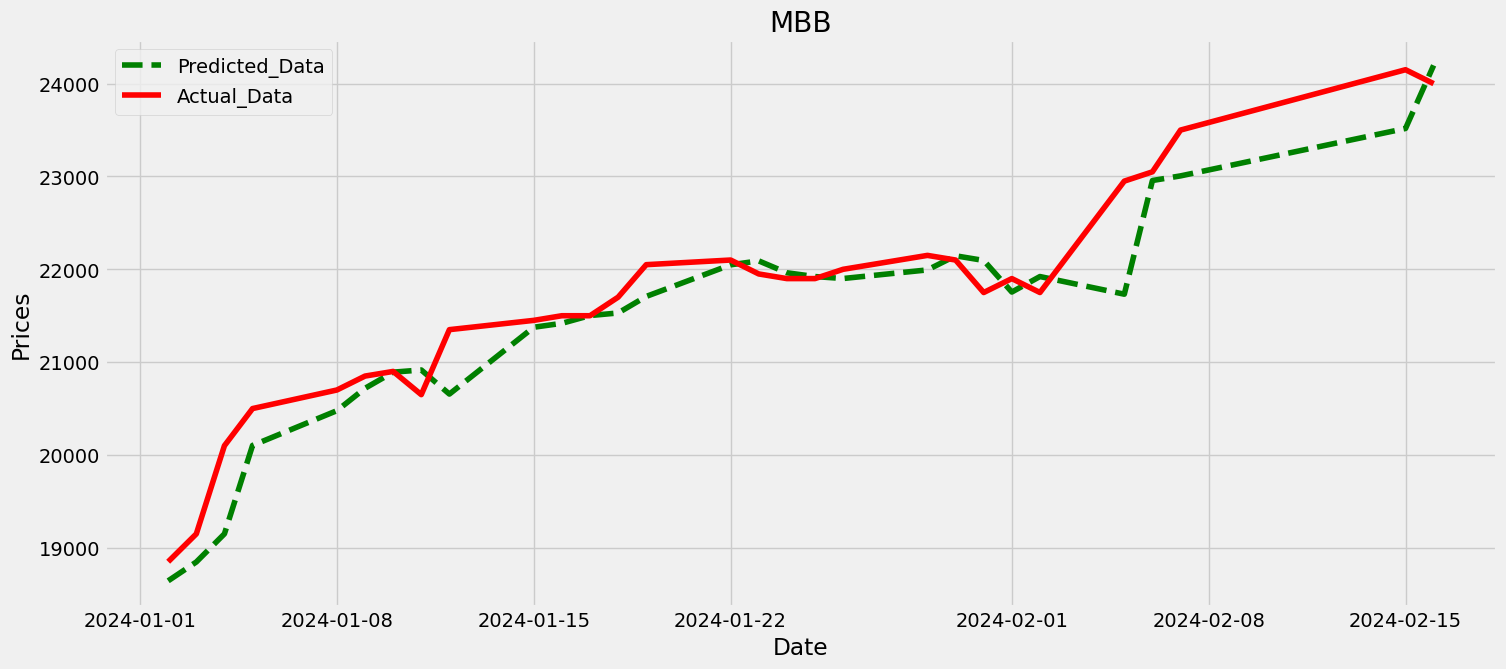

Testing Mean Squared Error is 347694.20203199005


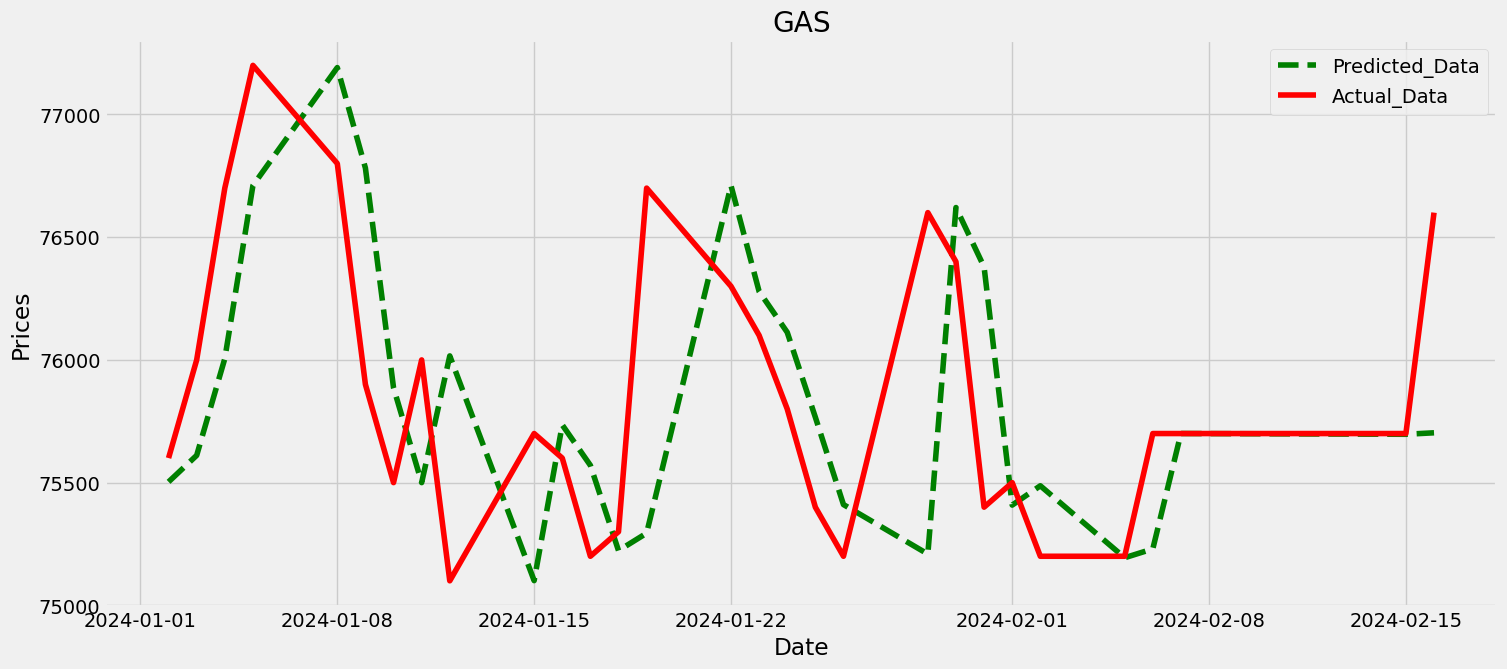

Testing Mean Squared Error is 33993.502140178934


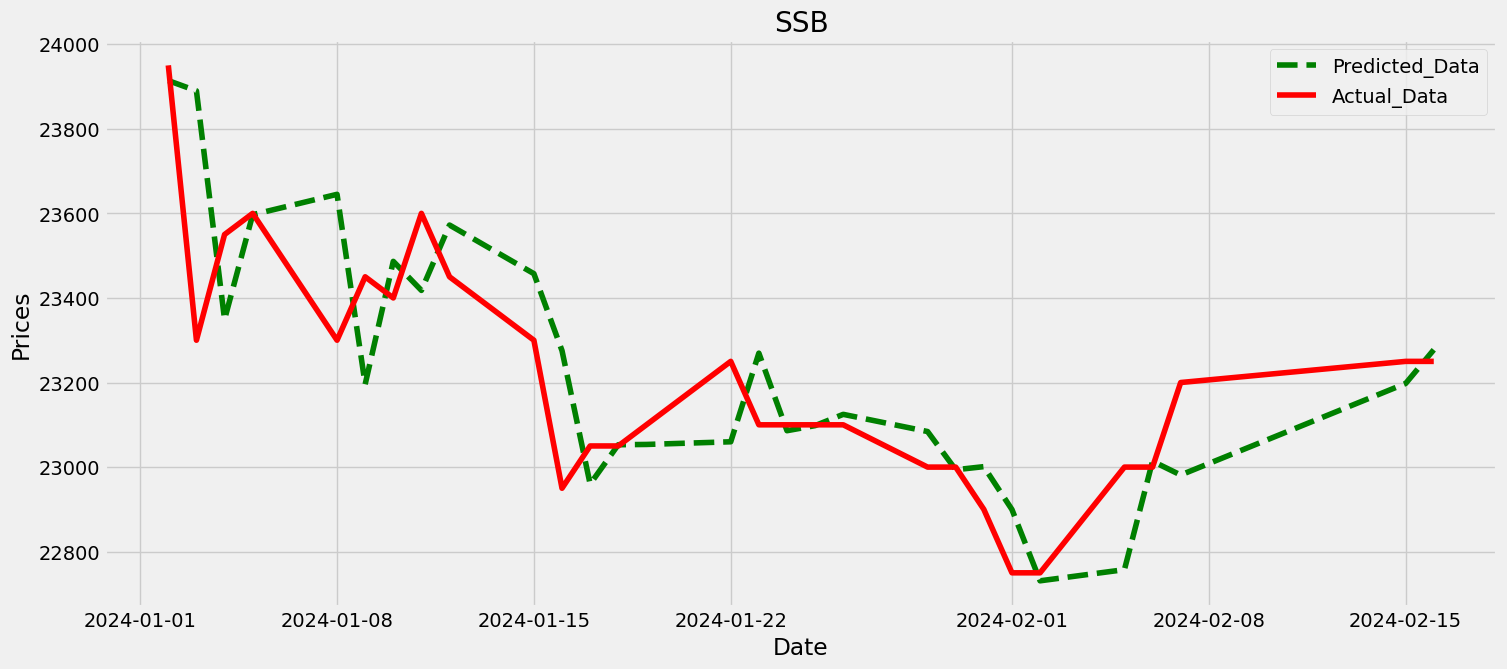

Testing Mean Squared Error is 40814.075314255504


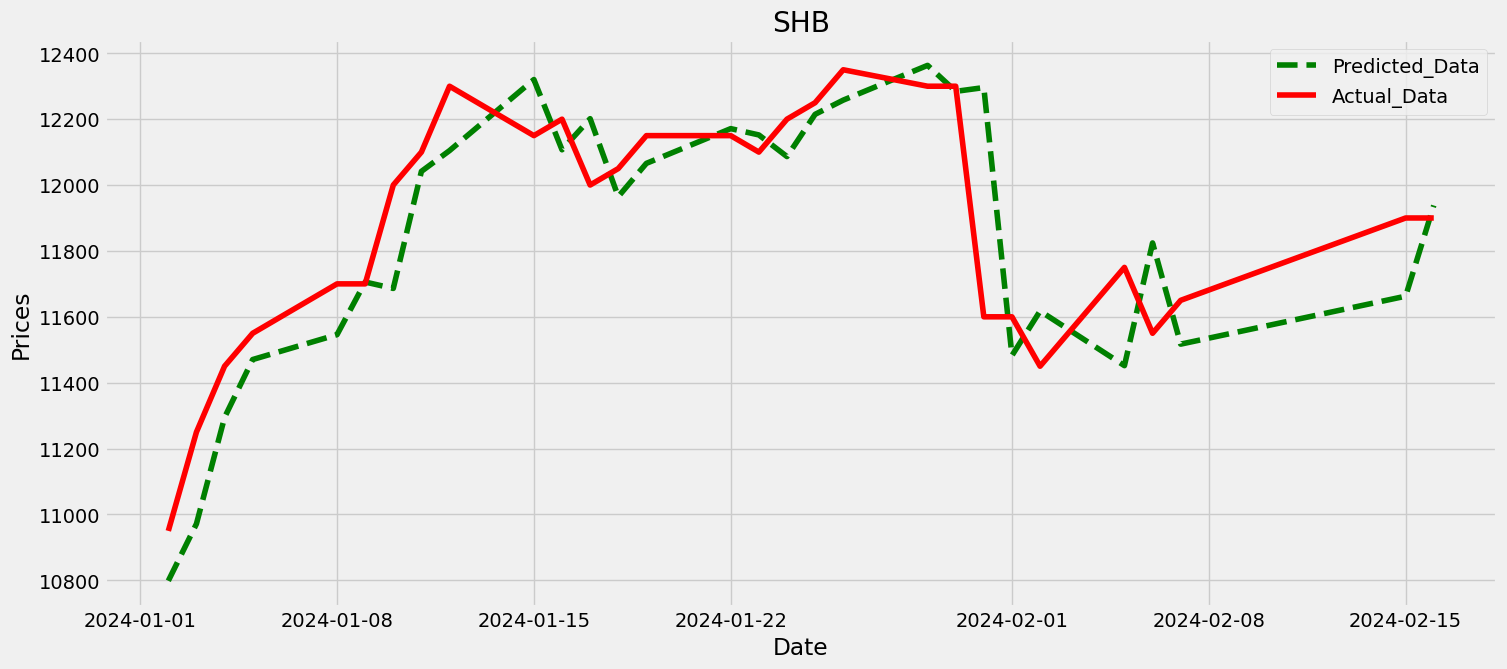

Testing Mean Squared Error is 89330.4741780553


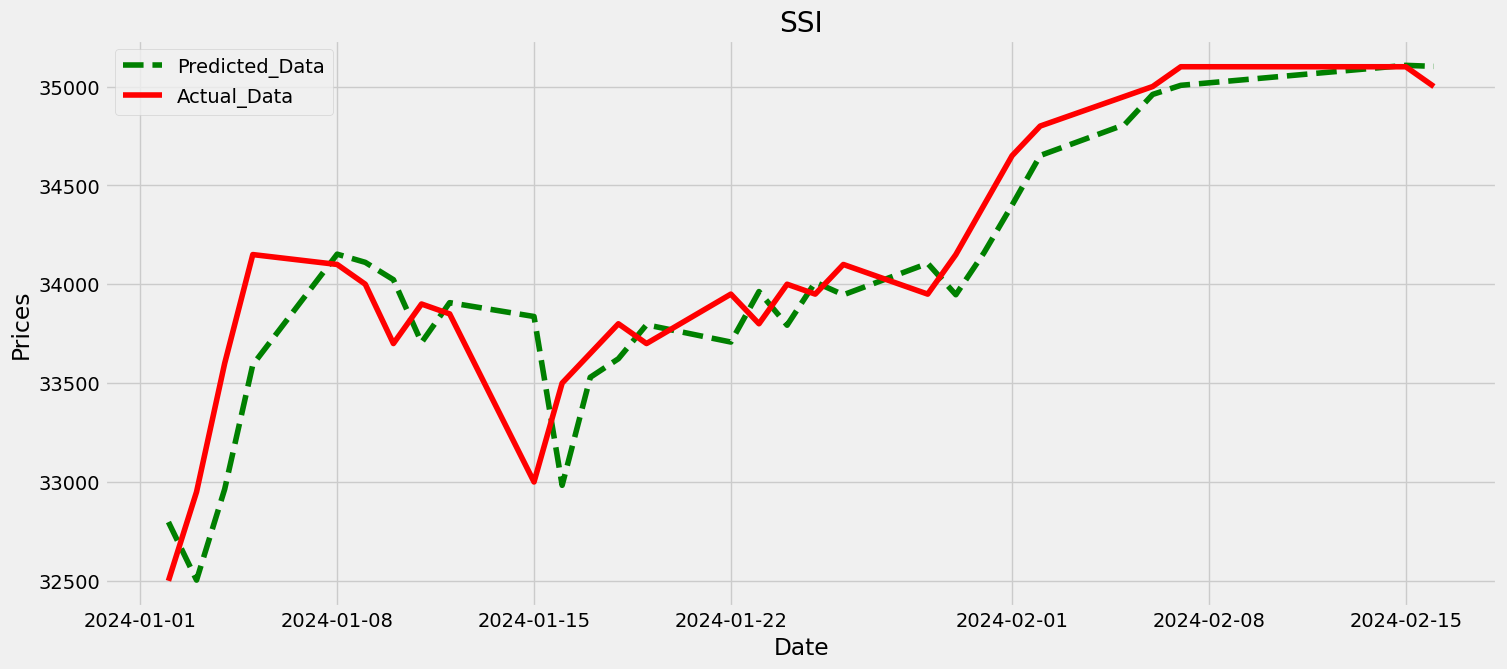

Testing Mean Squared Error is 122674.92439874503


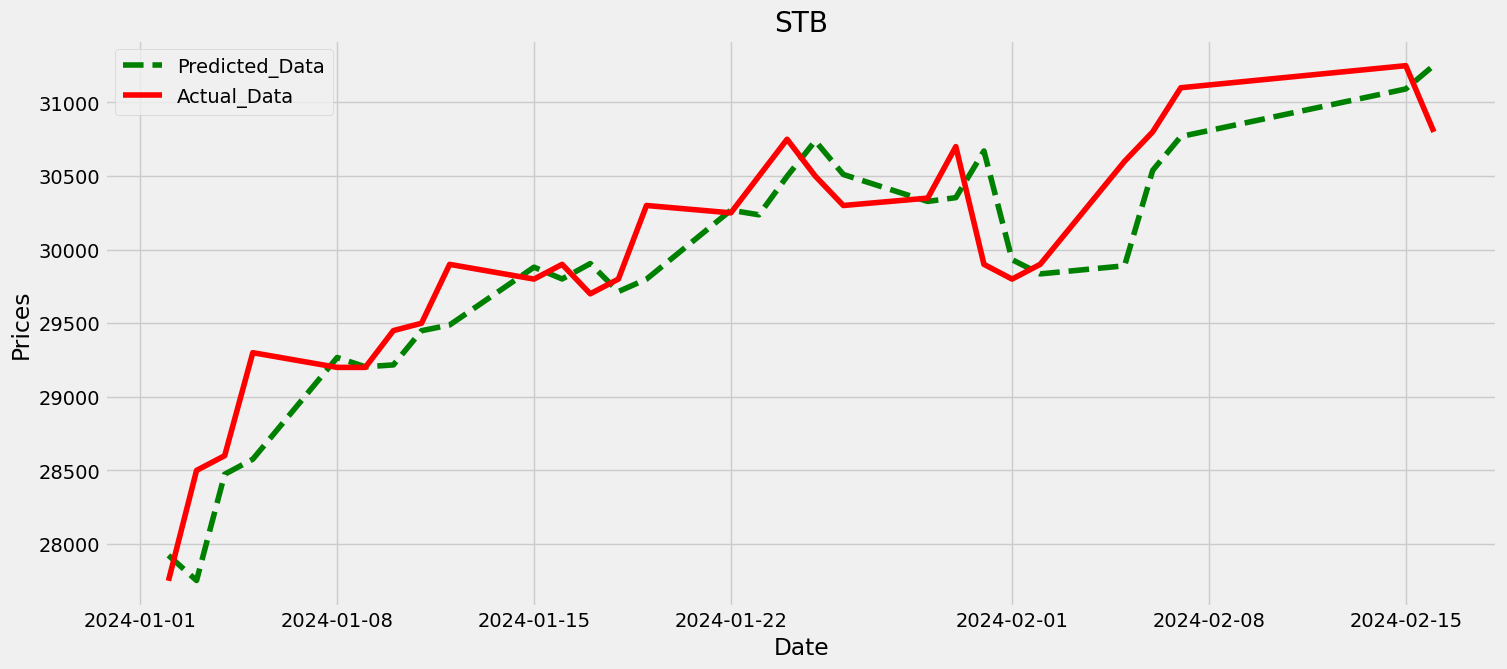

Testing Mean Squared Error is 45380.520505051056


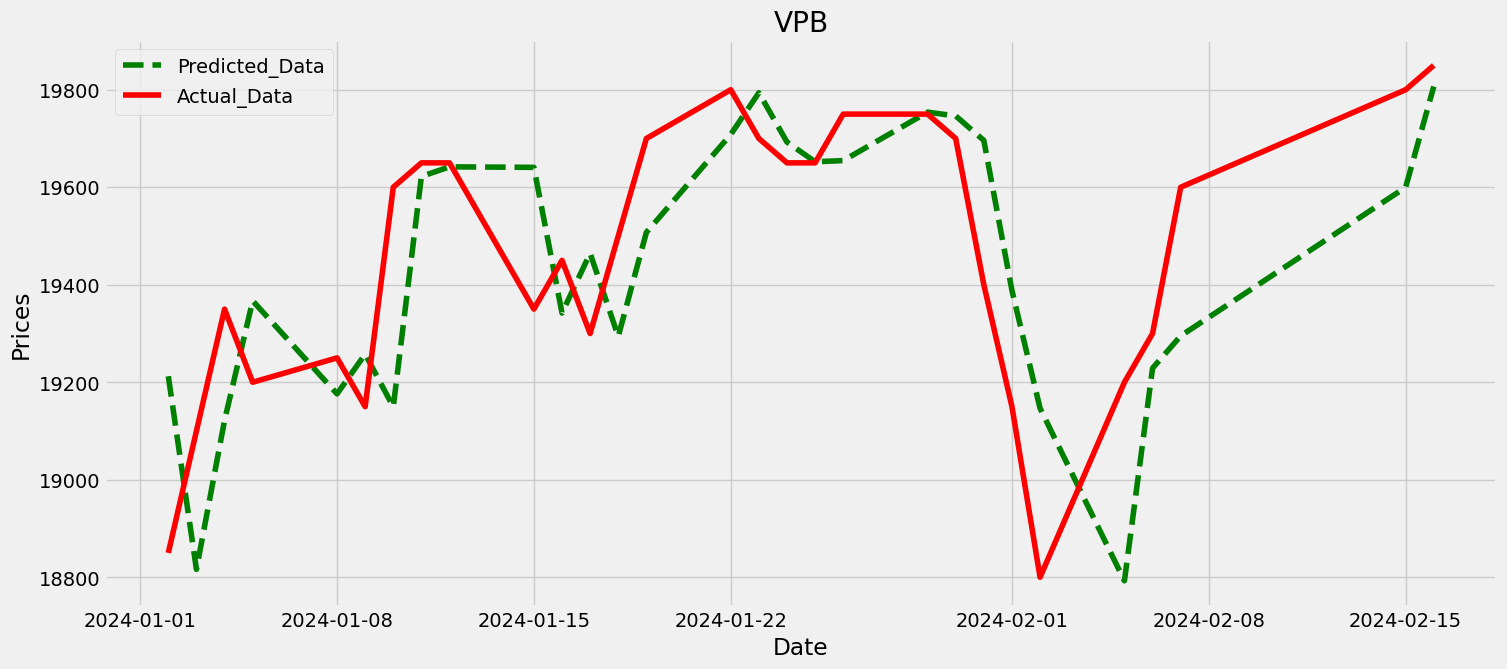

In [24]:
for stock in df.columns[1:]:
    model_predictions = ARIMA_pre(train_data, test_data, stock)
    model_plot(stock, model_predictions)